# **<center><font color= BEE7FF> Mata Kuliah Data Mining & Business Intelligence (B)</font></center>**
# **<center><font color= BEE7FF > Studi Kasus Regresi </font></center>**

**<justify><font color="BEE7FF"> Kelompok 9:**  
1. Khalila Izzatunnisa (2206051544)  
2. Nadira Eka Rahmaharva (2206051525)  
3. Shinta Chandra (2206053940)
4. Zavier Raiyan Dana (2206829875)    



#<font color="BEE7FF">**Preparation**</font>


## Penjelasan Dataset  
<p align="justify"> Dalam studi kasus ini, kami menggunakan data harga penjualan rumah dari 80 variabel/fitur yang di record dan diduga mempengaruhi harga penjualan rumah (dalam USD) sesuai guideline yang ada pada kompetisi di kaggle. Data tersebut sudah terbagi menjadi train dan test dengan variabel target kami adalah 'Sale Price'.

<p align="justify"> Dengan menggunakan data tersebut, kami akan menganalisis faktor apa saja yang sebenarnya berpengaruh terhadap harga jual rumah lalu memodelkan dan memprediksi menggunakan metode regresi. Setelah itu, kami juga akan membandingkan model regresi mana yang paling baik berdasarkan kriteria kebaikan model.



sumber: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data?select=test.csv


## Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Model Regresi
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [ ]:
def cross_val(model):
    pred = cross_val_score(model, x_train, y_train, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')

def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Read Data

In [ ]:
df_train = pd.read_csv('https://raw.githubusercontent.com/shintachandra/DATA/main/train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/shintachandra/DATA/main/test.csv')

In [ ]:
df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [ ]:
df_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd        NaN   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd        NaN   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard        NaN   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

In [ ]:
df_train.shape

(1460, 81)

In [ ]:
df_test.shape

(1459, 80)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [ ]:
df_train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [ ]:
df_test.describe()

Id   MSSubClass  LotFrontage       LotArea  OverallQual  \
count  1459.000000  1459.000000  1232.000000   1459.000000  1459.000000   
mean   2190.000000    57.378341    68.580357   9819.161069     6.078821   
std     421.321334    42.746880    22.376841   4955.517327     1.436812   
min    1461.000000    20.000000    21.000000   1470.000000     1.000000   
25%    1825.500000    20.000000    58.000000   7391.000000     5.000000   
50%    2190.000000    50.000000    67.000000   9399.000000     6.000000   
75%    2554.500000    70.000000    80.000000  11517.500000     7.000000   
max    2919.000000   190.000000   200.000000  56600.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1459.000000  1459.000000   1459.000000  1444.000000  1458.000000   
mean      5.553804  1971.357779   1983.662783   100.709141   439.203704   
std       1.113740    30.390071     21.130467   177.625900   455.268042   
min       1.000000  1879.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1953.000000   1963.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1992.000000     0.000000   350.500000   
75%       6.000000  2001.000000   2004.000000   164.000000   753.500000   
max       9.000000  2010.000000   2010.000000  1290.000000  4010.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1458.000000  1458.000000  1458.000000  1459.000000  1459.000000   
mean     52.619342   554.294925  1046.117970  1156.534613   325.967786   
std     176.753926   437.260486   442.898624   398.165820   420.610226   
min       0.000000     0.000000     0.000000   407.000000     0.000000   
25%       0.000000   219.250000   784.000000   873.500000     0.000000   
50%       0.000000   460.000000   988.000000  1079.000000     0.000000   
75%       0.000000   797.750000  1305.000000  1382.500000   676.000000   
max    1526.000000  2140.000000  5095.000000  5095.000000  1862.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1459.000000  1459.000000   1457.000000   1457.000000  1459.000000   
mean       3.543523  1486.045922      0.434454      0.065202     1.570939   
std       44.043251   485.566099      0.530648      0.252468     0.555190   
min        0.000000   407.000000      0.000000      0.000000     0.000000   
25%        0.000000  1117.500000      0.000000      0.000000     1.000000   
50%        0.000000  1432.000000      0.000000      0.000000     2.000000   
75%        0.000000  1721.000000      1.000000      0.000000     2.000000   
max     1064.000000  5095.000000      3.000000      2.000000     4.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
count  1459.000000   1459.000000   1459.000000   1459.000000  1459.00000   
mean      0.377656      2.854010      1.042495      6.385195     0.58122   
std       0.503017      0.829788      0.208472      1.508895     0.64742   
min       0.000000      0.000000      0.000000      3.000000     0.00000   
25%       0.000000      2.000000      1.000000      5.000000     0.00000   
50%       0.000000      3.000000      1.000000      6.000000     0.00000   
75%       1.000000      3.000000      1.000000      7.000000     1.00000   
max       2.000000      6.000000      2.000000     15.000000     4.00000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1381.000000  1458.000000  1458.000000  1459.000000  1459.000000   
mean   1977.721217     1.766118   472.768861    93.174777    48.313914   
std      26.431175     0.775945   217.048611   127.744882    68.883364   
min    1895.000000     0.000000     0.000000     0.000000     0.000000   
25%    1959.000000     1.000000   318.000000     0.000000     0.000000   
50%    1979.000000     2.000000   480.000000     0.000000    28.000000   
75%    2002.000000     2.000000   576.000000   168.000000    72.000000   
max    2207.000000     5.0

#<font color="BEE7FF"> **Data Pre-Processing**

Kolom Id hanya mencatat observasi sebagai urutannya sehingga tidak berguna untuk analisis lebih lanjut. Oleh karena itu, kami menghapus kolom Id di awal

In [ ]:
df_train.drop('Id', axis=1, inplace=True)
df_test.drop('Id', axis=1, inplace=True)

## Numerical and Categorical Features

In [ ]:
numerical_feature = df_train.dtypes[df_train.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_feature))

categorical_feature = df_train.dtypes[df_train.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_feature))

Number of Numerical features:  37
Number of Categorical features:  43


In [ ]:
print("Kolom numerik: ",'\n', numerical_feature)
print("")
print('Kolom kategorik: ','\n', categorical_feature)

Kolom numerik:  
 Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

Kolom kategorik:  
 Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'B

In [ ]:
df_train[numerical_feature].head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

## Duplikasi

In [ ]:
# Menampilkan jumlah baris duplikat pada data train
print(df_train.duplicated().sum())

0


In [ ]:
# Menampilkan jumlah baris duplikat pada data test
print(df_test.duplicated().sum())

0


Tidak terdapat duplikasi pada data

## Missing Value

### Data Train

In [ ]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['TotalNA', 'Percent'])
missing_data.head(20)

TotalNA   Percent
PoolQC           1453  0.995205
MiscFeature      1406  0.963014
Alley            1369  0.937671
Fence            1179  0.807534
MasVnrType        872  0.597260
FireplaceQu       690  0.472603
LotFrontage       259  0.177397
GarageYrBlt        81  0.055479
GarageCond         81  0.055479
GarageType         81  0.055479
GarageFinish       81  0.055479
GarageQual         81  0.055479
BsmtExposure       38  0.026027
BsmtFinType2       38  0.026027
BsmtCond           37  0.025342
BsmtQual           37  0.025342
BsmtFinType1       37  0.025342
MasVnrArea          8  0.005479
Electrical          1  0.000685
MSSubClass          0  0.000000

In [ ]:
# columns where NaN values have meaning e.g. no pool etc.
cols_fillna = ['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu',
               'GarageQual','GarageCond','GarageFinish','GarageType', 'Electrical',
               'KitchenQual', 'SaleType', 'Functional', 'Exterior2nd', 'Exterior1st',
               'BsmtExposure','BsmtCond','BsmtQual','BsmtFinType1','BsmtFinType2',
               'MSZoning', 'Utilities']

In [ ]:
df_train[cols_fillna] = df_train[cols_fillna].fillna('No')

In [ ]:
df_train['BsmtExposure'].unique()

array(['No', 'Gd', 'Mn', 'Av'], dtype=object)

In [ ]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

Total   Percent
LotFrontage     259  0.177397
GarageYrBlt      81  0.055479
MasVnrArea        8  0.005479
MSSubClass        0  0.000000
KitchenAbvGr      0  0.000000

In [ ]:
# Melihat baris yang terdapat missing value pada GarageYrBlt
df_train[df_train['GarageYrBlt'].isnull()]

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
39            90       RL         65.0     6040   Pave    No      Reg   
48           190       RM         33.0     4456   Pave    No      Reg   
78            90       RL         72.0    10778   Pave    No      Reg   
88            50  C (all)        105.0     8470   Pave    No      IR1   
89            20       RL         60.0     8070   Pave    No      Reg   
99            20       RL         77.0     9320   Pave    No      IR1   
108           50       RM         85.0     8500   Pave    No      Reg   
125          190       RM         60.0     6780   Pave    No      Reg   
127           45       RM         55.0     4388   Pave    No      IR1   
140           20       RL         70.0    10500   Pave    No      Reg   
148           20       RL         63.0     7500   Pave    No      Reg   
155           50       RL         60.0     9600   Pave    No      Reg   
163           45       RL         55.0     5500   Pave    No      Reg   
165          190       RL         62.0    10106   Pave    No      Reg   
198           75       RM         92.0     5520   Pave    No      Reg   
210           30       RL         67.0     5604   Pave    No      Reg   
241           30       RM         40.0     3880   Pave    No      Reg   
250           30       RL         55.0     5350   Pave    No      IR1   
287           20       RL          NaN     8125   Pave    No      IR1   
291          190       RL         55.0     5687   Pave  Grvl      Reg   
307           50       RM          NaN     7920   Pave  Grvl      IR1   
375           30       RL          NaN    10020   Pave    No      IR1   
386           50       RL         58.0     8410   Pave    No      Reg   
393           30       RL          NaN     7446   Pave    No      Reg   
431           50       RM         60.0     5586   Pave    No      IR1   
434          180       RM         21.0     1890   Pave    No      Reg   
441           90       RL         92.0    12108   Pave    No      Reg   
464           20       RL         60.0     8430   Pave    No      Reg   
495           30  C (all)         60.0     7879   Pave    No      Reg   
520          190       RL         60.0    10800   Pave  Grvl      Reg   
528           30       RL         58.0     9098   Pave    No      IR1   
533           20       RL         50.0     5000   Pave    No      Reg   
535          190       RL         70.0     7000   Pave    No      Reg   
562           30       RL         63.0    13907   Pave    No      Reg   
582           90       RL         81.0    11841   Grvl    No      Reg   
613           20       RL         70.0     8402   Pave    No      Reg   
614          180       RM         21.0     1491   Pave    No      Reg   
620           30       RL         45.0     8248   Pave  Grvl      Reg   
635          190       RH         60.0    10896   Pave  Pave      Reg   
636           30       RM         51.0     6120   Pave    No      Reg   
638           30       RL         67.0     8777   Pave    No      Reg   
649          180       RM         21.0     1936   Pave    No      Reg   
705          190       RM         70.0     5600   Pave    No      Reg   
710           30       RL         56.0     4130   Pave    No      IR1   
738           90       RL         60.0    10800   Pave    No      Reg   
750           50       RM         55.0     8800   Pave  Grvl      Reg   
784           75       RM         35.0     6300   Pave  Grvl      Reg   
826           45       RM         50.0     6130   Pave    No      Reg   
843           90       RL         80.0     8000   Pave    No      Reg   
921           90       RL         67.0     8777   Pave    No      Reg   
942           90       RL         42.0     7711   Pave    No      IR1   
954           90       RL         35.0     9400   Pave    No      IR1   
960           20       RL         50.0     7207   Pave    No      IR1   
968           50       RM         50.0     5925   Pave    No    

dapat dilihat semua baris dengan missing value pada kolom GarageYrBlt, memiliki GarageType = No atau tidak memiliki garasi, artinya kolom  GarageYrBlt yang berisi tahun dibangunnya garasi akan bernilai 0

In [ ]:
df_train[df_train['MasVnrArea'].isnull()]

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
234           60       RL          NaN     7851   Pave    No      Reg   
529           20       RL          NaN    32668   Pave    No      IR1   
650           60       FV         65.0     8125   Pave    No      Reg   
936           20       RL         67.0    10083   Pave    No      Reg   
973           20       FV         95.0    11639   Pave    No      Reg   
977          120       FV         35.0     4274   Pave  Pave      IR1   
1243          20       RL        107.0    13891   Pave    No      Reg   
1278          60       RL         75.0     9473   Pave    No      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
234          Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
529          Lvl    AllPub   CulDSac       Gtl      Crawfor       Norm   
650          Lvl    AllPub    Inside       Gtl      Somerst       Norm   
936          Lvl    AllPub    Inside       Gtl      SawyerW       Norm   
973          Lvl    AllPub    Corner       Gtl      Somerst       Norm   
977          Lvl    AllPub    Inside       Gtl      Somerst       Norm   
1243         Lvl    AllPub    Inside       Gtl      NridgHt       Norm   
1278         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
234        Norm     1Fam     2Story            6            5       2002   
529        Norm     1Fam     1Story            6            3       1957   
650        Norm     1Fam     2Story            7            6       2007   
936        Norm     1Fam     1Story            7            5       2003   
973        Norm     1Fam     1Story            7            5       2007   
977        Norm   TwnhsE     1Story            7            5       2006   
1243       Norm     1Fam     1Story           10            5       2006   
1278       Norm     1Fam     2Story            8            5       2002   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
234           2002     Gable  CompShg     VinylSd     VinylSd         No   
529           1975       Hip  CompShg     Wd Sdng       Stone         No   
650           2007     Gable  CompShg     CemntBd     CmentBd         No   
936           2003     Gable  CompShg     VinylSd     VinylSd         No   
973           2008     Gable  CompShg     CemntBd     CmentBd         No   
977           2007     Gable  CompShg     VinylSd     VinylSd         No   
1243          2006     Gable  CompShg     VinylSd     VinylSd         No   
1278          2002     Gable  CompShg     VinylSd     VinylSd         No   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
234          NaN        Gd        TA      PConc       Gd       TA   
529          NaN        Gd        TA      PConc       TA       TA   
650          NaN        Gd        TA      PConc       Gd       TA   
936          NaN        Gd        TA      PConc       Gd       TA   
973          NaN        Gd        TA      PConc       Gd       TA   
977          NaN        Gd        TA      PConc       Gd       TA   
1243         NaN        Ex        TA      PConc       Ex       Gd   
1278         NaN        Gd        TA      PConc       Gd       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
234            No          GLQ         625          Unf           0   
529            No          Rec        1219          Unf           0   
650            No          Unf           0          Unf           0   
936            No          GLQ         833          Unf           0   
973            No          Unf           0          Unf           0   
977            No          GLQ        1106          Unf           0   
1243           Gd          GLQ        1386          Unf           0   
1278           No          GLQ         804          Unf           0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC Ce

begitu pula dengan baris yang terdapat missing value pada kolom MasVnrArea, memiliki MasVnrType = No atau tidak terdapat mansory veneer, sehingga otomatis MasVnrArea nya akan bernilai 0

In [ ]:
# Imputasi 0
df_train['GarageYrBlt'] = df_train['GarageYrBlt'].fillna(0)
df_train['MasVnrArea'] = df_train['MasVnrArea'].fillna(0)

In [ ]:
# Imputasi missing value pada LotFrontage dengan menggunakan mean per neighborhood
df_train["LotFrontage"] = df_train.groupby("Neighborhood")["LotFrontage"].transform(
       lambda x: x.fillna(x.mean()))

In [ ]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

Total  Percent
MSSubClass       0      0.0
MSZoning         0      0.0
GarageYrBlt      0      0.0
GarageType       0      0.0
FireplaceQu      0      0.0

Missing Value sudah ditangani

### Data Test

In [ ]:
total = df_test.isnull().sum().sort_values(ascending=False)
percent = (df_test.isnull().sum()/df_test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(35)

Total   Percent
PoolQC         1456  0.997944
MiscFeature    1408  0.965045
Alley          1352  0.926662
Fence          1169  0.801234
MasVnrType      894  0.612748
FireplaceQu     730  0.500343
LotFrontage     227  0.155586
GarageYrBlt      78  0.053461
GarageFinish     78  0.053461
GarageQual       78  0.053461
GarageCond       78  0.053461
GarageType       76  0.052090
BsmtCond         45  0.030843
BsmtExposure     44  0.030158
BsmtQual         44  0.030158
BsmtFinType2     42  0.028787
BsmtFinType1     42  0.028787
MasVnrArea       15  0.010281
MSZoning          4  0.002742
BsmtHalfBath      2  0.001371
Functional        2  0.001371
Utilities         2  0.001371
BsmtFullBath      2  0.001371
KitchenQual       1  0.000685
BsmtFinSF1        1  0.000685
SaleType          1  0.000685
TotalBsmtSF       1  0.000685
GarageCars        1  0.000685
Exterior2nd       1  0.000685
Exterior1st       1  0.000685
GarageArea        1  0.000685
BsmtUnfSF         1  0.000685
BsmtFinSF2        1  0.000685
TotRmsAbvGrd      0  0.000000
KitchenAbvGr      0  0.000000

In [ ]:
df_test[cols_fillna] = df_test[cols_fillna].fillna('No')

In [ ]:
total = df_test.isnull().sum().sort_values(ascending=False)
percent = (df_test.isnull().sum()/df_test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(12)

Total   Percent
LotFrontage     227  0.155586
GarageYrBlt      78  0.053461
MasVnrArea       15  0.010281
BsmtFullBath      2  0.001371
BsmtHalfBath      2  0.001371
TotalBsmtSF       1  0.000685
BsmtUnfSF         1  0.000685
BsmtFinSF2        1  0.000685
GarageCars        1  0.000685
BsmtFinSF1        1  0.000685
GarageArea        1  0.000685
TotRmsAbvGrd      0  0.000000

In [ ]:
df_test[df_test['GarageYrBlt'].isnull()]

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
53            90       RL         98.0    13260   Pave    No      IR1   
71            30       RM         56.0     4485   Pave  Grvl      Reg   
79           190       RM        100.0     9045   Pave    No      Reg   
92            70       RM         60.0    12900   Pave  Grvl      Reg   
96           190       RL         60.0     9900   Pave    No      Reg   
98            70  C (all)          NaN     6449   Pave    No      IR1   
100           90       RL         72.0    10773   Pave    No      Reg   
130           20       RL         64.0     6410   Pave    No      Reg   
133           90       RH         60.0     7200   Pave  Pave      Reg   
134           50       RL         51.0     9839   Pave    No      Reg   
154          160       RM         21.0     1476   Pave    No      Reg   
155          160       RM         21.0     1900   Pave    No      Reg   
257           20       RL         63.0     7500   Pave    No      Reg   
261           20       RL         63.0    13072   Pave    No      Reg   
327           30       RL         90.0     5400   Pave    No      Reg   
348           70       RM         90.0     9900   Pave    No      Reg   
350          190       RM         63.0     7627   Pave    No      Reg   
351           50       RM         56.0    10134   Pave  Grvl      Reg   
359           30  C (all)          NaN     3300   Pave    No      Reg   
362           30  C (all)         72.0     9392   Pave    No      Reg   
371           90       RM         50.0     3000   Pave  Grvl      Reg   
374          190       RM         41.0     5852   Pave    No      IR3   
376           85       RM         86.0     5160   Pave  Grvl      Reg   
379           90       RL         60.0    10800   Pave    No      Reg   
387           20       RL          NaN     9000   Pave    No      Reg   
433           90       RL         65.0    10926   Pave    No      Reg   
550           20       RL         63.0    13072   Pave    No      Reg   
621           90       RL        113.0     8513   Pave    No      Reg   
630          190       RM         63.0    11426   Pave  Grvl      Reg   
633           30       RM         60.0     5400   Pave    No      Reg   
636           50       RM         44.0     5914   Pave  Grvl      Reg   
639           20       RM        103.0    12205   Pave    No      Reg   
644           70       RM         60.0     6000   Pave  Grvl      Reg   
666           60       RM         57.0     8094   Pave  Grvl      Reg   
675          190       RM         60.0    10320   Pave  Grvl      Reg   
691           30       RL         85.0    19550   Pave    No      Reg   
693           90       RL         50.0     9350   Pave    No      Reg   
729           90       RL         65.0     6012   Pave    No      Reg   
730           90       RL         74.0     6845   Pave    No      Reg   
731          190       RL         56.0     6931   Pave    No      Reg   
732           50       RL         60.0    12180   Pave    No      Reg   
733           50       RL         57.0     8050   Pave    No      Reg   
752           50       RM         58.0     8155   Pave    No      Reg   
778           20       RL         77.0     9278   Pave    No      Reg   
786          160       RM         21.0     1477   Pave    No      Reg   
893           20       RL         63.0     7500   Pave    No      Reg   
894           20       RL         63.0     7500   Pave    No      Reg   
938           20       RL         50.0     5000   Pave    No      Reg   
939           50       RL         51.0     3500   Pave    No      Reg   
962           50       RL         60.0    14190   Pave    No      Reg   
966           70       RL         60.0    10800   Pave  Grvl      Reg   
1092          90       RL         74.0     6882   Pave    No      Reg   
1093          90       RL         52.0     8741   Pave    No      Reg   
1097          90       RL         60.0    10890   Pave    No    

In [ ]:
df_test[df_test['GarageCars'].isnull()]

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1116          70       RM         50.0     9060   Pave    No      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1116         Lvl    AllPub    Inside       Gtl       IDOTRR       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1116       Norm     1Fam     2Story            5            6       1923   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1116          1999     Gable  CompShg     Wd Sdng     Plywood         No   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1116         0.0        TA        TA     BrkTil       Gd       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1116           No          ALQ       548.0          Unf         0.0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1116      311.0        859.0    GasA        Ex          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1116       942       886             0       1828           0.0           0.0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1116         2         0             3             1          Gd   

      TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
1116             6        Typ           0          No     Detchd          NaN   

     GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
1116           No         NaN         NaN         No         No          Y   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
1116         174            0            212          0            0   

      PoolArea PoolQC  Fence MiscFeature  MiscVal  MoSold  YrSold SaleType  \
1116         0     No  MnPrv          No        0       3    2007       WD   

     SaleCondition  
1116        Alloca

In [ ]:
df_test[df_test['GarageArea'].isnull()]

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1116          70       RM         50.0     9060   Pave    No      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1116         Lvl    AllPub    Inside       Gtl       IDOTRR       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1116       Norm     1Fam     2Story            5            6       1923   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1116          1999     Gable  CompShg     Wd Sdng     Plywood         No   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1116         0.0        TA        TA     BrkTil       Gd       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1116           No          ALQ       548.0          Unf         0.0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1116      311.0        859.0    GasA        Ex          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1116       942       886             0       1828           0.0           0.0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1116         2         0             3             1          Gd   

      TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
1116             6        Typ           0          No     Detchd          NaN   

     GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
1116           No         NaN         NaN         No         No          Y   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
1116         174            0            212          0            0   

      PoolArea PoolQC  Fence MiscFeature  MiscVal  MoSold  YrSold SaleType  \
1116         0     No  MnPrv          No        0       3    2007       WD   

     SaleCondition  
1116        Alloca

semua baris yang memiliki missing value pada kolom yang berhubungan dengan garasi yaitu GarageYrBlt, GarageCars, dan GarageArea mempunyai tipe garasi No atau tidak ada garasi, sehingga otomatis nilai pada kolom-kolom tersebut adalah 0

In [ ]:
df_test[df_test['MasVnrArea'].isnull()]

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
231           60       RL          NaN    12891   Pave    No      IR1   
246           20       FV         90.0     7993   Pave    No      IR1   
422           60       RL         70.0     8749   Pave    No      Reg   
532           60       RL          NaN     7750   Pave    No      Reg   
544           20       RL         87.0    10037   Pave    No      Reg   
581           60       FV          NaN     7500   Pave    No      Reg   
851           60       RL         59.0    15810   Pave    No      IR1   
865           80       RL          NaN    11950   Pave    No      IR1   
880           20       RL         85.0     9965   Pave    No      Reg   
889           60       FV        112.0    12217   Pave    No      IR1   
908          120       FV         30.0     5330   Pave  Pave      IR2   
1132          20       RL         68.0     8298   Pave    No      IR1   
1197          60       RL        103.0    12867   Pave    No      IR1   
1226          20       RL         49.0    15218   Pave    No      IR1   
1402          20       RL         75.0     8050   Pave    No      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
231          Lvl    AllPub    Corner       Gtl      Gilbert       Norm   
246          Lvl    AllPub    Inside       Gtl      Somerst       Norm   
422          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
532          Lvl    AllPub    Inside       Gtl      Gilbert       RRAn   
544          Lvl    AllPub    Corner       Gtl      Somerst      Feedr   
581          Lvl    AllPub    Inside       Gtl      Somerst       Norm   
851          Lvl    AllPub    Inside       Gtl      Gilbert       RRAn   
865          Lvl    AllPub    Corner       Gtl      Gilbert       Norm   
880          Lvl    AllPub       FR2       Gtl      Somerst      Feedr   
889          Lvl    AllPub    Inside       Gtl      Somerst       Norm   
908          Lvl    AllPub    Inside       Gtl      Somerst       Norm   
1132         HLS    AllPub    Inside       Gtl       Timber       Norm   
1197         Lvl    AllPub    Corner       Gtl      NridgHt       Norm   
1226         Lvl    AllPub   CulDSac       Gtl      Somerst       RRAn   
1402         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
231        Norm     1Fam     2Story            8            5       2002   
246        Norm     1Fam     1Story            7            5       2008   
422        Norm     1Fam     2Story            7            5       2002   
532        Norm     1Fam     2Story            7            5       2002   
544        Norm     1Fam     1Story            8            5       2006   
581        Norm     1Fam     2Story            7            5       2002   
851        Norm     1Fam     2Story            6            5       2007   
865        Norm     1Fam       SLvl            7            5       2003   
880        Norm     1Fam     1Story            7            5       2007   
889        Norm     1Fam     2Story            8            5       2007   
908        Norm   TwnhsE     1Story            8            5       2006   
1132       Norm     1Fam     1Story            8            5       2006   
1197       Norm     1Fam     2Story            8            5       2005   
1226       Norm     1Fam     1Story            8            5       2006   
1402       Norm     1Fam     1Story            6            5       2002   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
231           2002     Gable  CompShg     VinylSd     VinylSd         No   
246           2009     Gable  CompShg     VinylSd     VinylSd         No   
422           2002     Gable  CompShg     VinylSd     VinylSd         No   
532           2002     Gable  CompShg     VinylSd     VinylSd         No   
544           2007       Hip  CompShg     VinylSd     V

sama seperti pada data train, baris yang memiliki missing value pada kolom MasVnrArea adalah yang tidak memiliki masonry veneer, sehingga otomatis MasVnrArea nya akan bernilai 0

In [ ]:
df_test[df_test['BsmtFullBath'].isnull()]

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
660          20       RM         99.0     5940   Pave    No      IR1   
728          20       RL        123.0    47007   Pave    No      IR1   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
660         Lvl    AllPub       FR3       Gtl      BrkSide      Feedr   
728         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
660       Norm     1Fam     1Story            4            7       1946   
728       Norm     1Fam     1Story            5            7       1959   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
660          1950     Gable  CompShg     MetalSd      CBlock         No   
728          1996     Gable  CompShg     Plywood     Plywood         No   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
660         0.0        TA        TA      PConc       No       No           No   
728         0.0        TA        TA       Slab       No       No           No   

    BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
660           No         NaN           No         NaN        NaN          NaN   
728           No         0.0           No         0.0        0.0          0.0   

    Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
660    GasA        TA          Y      FuseA       896         0             0   
728    GasA        TA          Y      SBrkr      3820         0             0   

     GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
660        896           NaN           NaN         1         0             2   
728       3820           NaN           NaN         3         1             5   

     KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
660             1          TA             4        Typ           0   
728             1          Ex            11        Typ           2   

    FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  \
660          No     Detchd       1946.0          Unf         1.0       280.0   
728          Gd     Attchd       1959.0          Unf         2.0       624.0   

    GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
660         TA         TA          Y           0            0              0   
728         TA         TA          Y           0          372              0   

     3SsnPorch  ScreenPorch  PoolArea PoolQC  Fence MiscFeature  MiscVal  \
660          0            0         0     No  MnPrv          No        0   
728          0            0         0     No     No          No        0   

     MoSold  YrSold SaleType SaleCondition  
660       4    2008    ConLD       Abnorml  
728       7    2008       WD        Normal

In [ ]:
df_test[df_test['BsmtHalfBath'].isnull()]

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
660          20       RM         99.0     5940   Pave    No      IR1   
728          20       RL        123.0    47007   Pave    No      IR1   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
660         Lvl    AllPub       FR3       Gtl      BrkSide      Feedr   
728         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
660       Norm     1Fam     1Story            4            7       1946   
728       Norm     1Fam     1Story            5            7       1959   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
660          1950     Gable  CompShg     MetalSd      CBlock         No   
728          1996     Gable  CompShg     Plywood     Plywood         No   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
660         0.0        TA        TA      PConc       No       No           No   
728         0.0        TA        TA       Slab       No       No           No   

    BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
660           No         NaN           No         NaN        NaN          NaN   
728           No         0.0           No         0.0        0.0          0.0   

    Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
660    GasA        TA          Y      FuseA       896         0             0   
728    GasA        TA          Y      SBrkr      3820         0             0   

     GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
660        896           NaN           NaN         1         0             2   
728       3820           NaN           NaN         3         1             5   

     KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
660             1          TA             4        Typ           0   
728             1          Ex            11        Typ           2   

    FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  \
660          No     Detchd       1946.0          Unf         1.0       280.0   
728          Gd     Attchd       1959.0          Unf         2.0       624.0   

    GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
660         TA         TA          Y           0            0              0   
728         TA         TA          Y           0          372              0   

     3SsnPorch  ScreenPorch  PoolArea PoolQC  Fence MiscFeature  MiscVal  \
660          0            0         0     No  MnPrv          No        0   
728          0            0         0     No     No          No        0   

     MoSold  YrSold SaleType SaleCondition  
660       4    2008    ConLD       Abnorml  
728       7    2008       WD        Normal

In [ ]:
df_test[df_test['TotalBsmtSF'].isnull()]

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
660          20       RM         99.0     5940   Pave    No      IR1   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
660         Lvl    AllPub       FR3       Gtl      BrkSide      Feedr   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
660       Norm     1Fam     1Story            4            7       1946   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
660          1950     Gable  CompShg     MetalSd      CBlock         No   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
660         0.0        TA        TA      PConc       No       No           No   

    BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
660           No         NaN           No         NaN        NaN          NaN   

    Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
660    GasA        TA          Y      FuseA       896         0             0   

     GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
660        896           NaN           NaN         1         0             2   

     KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
660             1          TA             4        Typ           0   

    FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  \
660          No     Detchd       1946.0          Unf         1.0       280.0   

    GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
660         TA         TA          Y           0            0              0   

     3SsnPorch  ScreenPorch  PoolArea PoolQC  Fence MiscFeature  MiscVal  \
660          0            0         0     No  MnPrv          No        0   

     MoSold  YrSold SaleType SaleCondition  
660       4    2008    ConLD       Abnorml

In [ ]:
df_test[df_test['BsmtUnfSF'].isnull()]

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
660          20       RM         99.0     5940   Pave    No      IR1   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
660         Lvl    AllPub       FR3       Gtl      BrkSide      Feedr   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
660       Norm     1Fam     1Story            4            7       1946   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
660          1950     Gable  CompShg     MetalSd      CBlock         No   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
660         0.0        TA        TA      PConc       No       No           No   

    BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
660           No         NaN           No         NaN        NaN          NaN   

    Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
660    GasA        TA          Y      FuseA       896         0             0   

     GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
660        896           NaN           NaN         1         0             2   

     KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
660             1          TA             4        Typ           0   

    FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  \
660          No     Detchd       1946.0          Unf         1.0       280.0   

    GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
660         TA         TA          Y           0            0              0   

     3SsnPorch  ScreenPorch  PoolArea PoolQC  Fence MiscFeature  MiscVal  \
660          0            0         0     No  MnPrv          No        0   

     MoSold  YrSold SaleType SaleCondition  
660       4    2008    ConLD       Abnorml

In [ ]:
df_test[df_test['BsmtFinSF2'].isnull()]

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
660          20       RM         99.0     5940   Pave    No      IR1   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
660         Lvl    AllPub       FR3       Gtl      BrkSide      Feedr   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
660       Norm     1Fam     1Story            4            7       1946   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
660          1950     Gable  CompShg     MetalSd      CBlock         No   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
660         0.0        TA        TA      PConc       No       No           No   

    BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
660           No         NaN           No         NaN        NaN          NaN   

    Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
660    GasA        TA          Y      FuseA       896         0             0   

     GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
660        896           NaN           NaN         1         0             2   

     KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
660             1          TA             4        Typ           0   

    FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  \
660          No     Detchd       1946.0          Unf         1.0       280.0   

    GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
660         TA         TA          Y           0            0              0   

     3SsnPorch  ScreenPorch  PoolArea PoolQC  Fence MiscFeature  MiscVal  \
660          0            0         0     No  MnPrv          No        0   

     MoSold  YrSold SaleType SaleCondition  
660       4    2008    ConLD       Abnorml

In [ ]:
df_test[df_test['BsmtFinSF1'].isnull()]

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
660          20       RM         99.0     5940   Pave    No      IR1   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
660         Lvl    AllPub       FR3       Gtl      BrkSide      Feedr   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
660       Norm     1Fam     1Story            4            7       1946   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
660          1950     Gable  CompShg     MetalSd      CBlock         No   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
660         0.0        TA        TA      PConc       No       No           No   

    BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
660           No         NaN           No         NaN        NaN          NaN   

    Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
660    GasA        TA          Y      FuseA       896         0             0   

     GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
660        896           NaN           NaN         1         0             2   

     KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
660             1          TA             4        Typ           0   

    FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  \
660          No     Detchd       1946.0          Unf         1.0       280.0   

    GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
660         TA         TA          Y           0            0              0   

     3SsnPorch  ScreenPorch  PoolArea PoolQC  Fence MiscFeature  MiscVal  \
660          0            0         0     No  MnPrv          No        0   

     MoSold  YrSold SaleType SaleCondition  
660       4    2008    ConLD       Abnorml

semua baris yang memiliki missing value pada kolom yang berhubungan dengan basement yaitu BsmtFullBath, BsmtHalfBath, TotalBsmtSF, BsmtUnfSF, BsmtFinSF2, dan BsmtFinSF1 mempunyai BsmtQual No atau tidak ada basement, sehingga otomatis nilai pada kolom-kolom tersebut adalah 0

In [ ]:
# Imputasi 0
cols_to_impute = ['GarageYrBlt', 'MasVnrArea', 'BsmtFullBath', 'BsmtHalfBath',
                  'GarageCars', 'GarageArea', 'TotalBsmtSF', 'BsmtUnfSF',
                  'BsmtFinSF2', 'BsmtFinSF1']
df_test[cols_to_impute] = df_test[cols_to_impute].fillna(0)

In [ ]:
# Imputasi missing value pada LotFrontage dengan menggunakan mean per neighborhood
df_test["LotFrontage"] = df_test.groupby("Neighborhood")["LotFrontage"].transform(
       lambda x: x.fillna(x.mean()))

In [ ]:
total = df_test.isnull().sum().sort_values(ascending=False)
percent = (df_test.isnull().sum()/df_test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

Total  Percent
MSSubClass        0      0.0
BedroomAbvGr      0      0.0
GarageType        0      0.0
FireplaceQu       0      0.0
Fireplaces        0      0.0

Missing Value berhasil diatasi

#<font color="BEE7FF"> **EDA**

##Variabel Numerik

In [ ]:
df_num = df_train.select_dtypes(include = ['float64', 'int64'])

In [ ]:
df_num.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

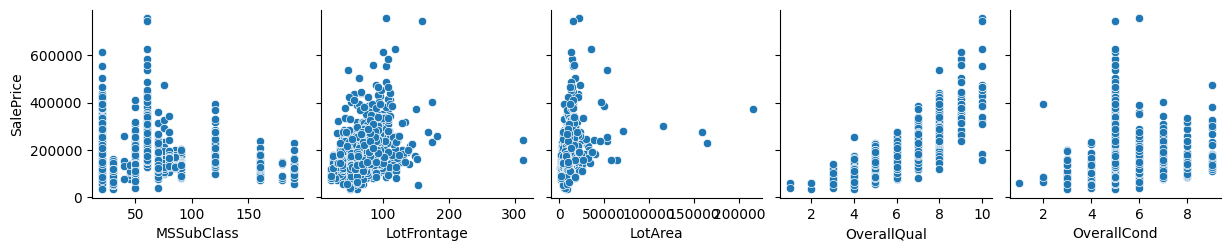

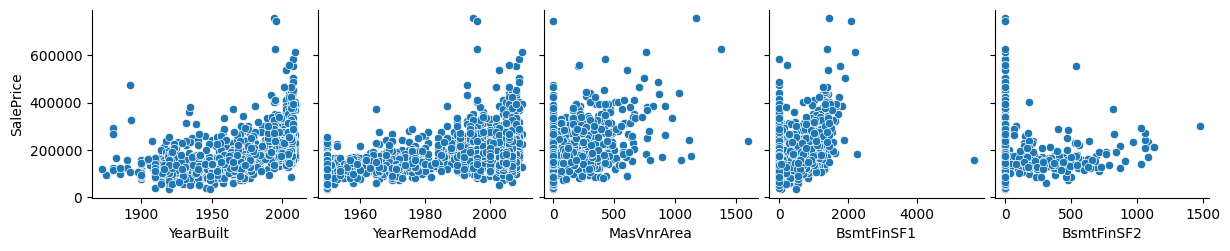

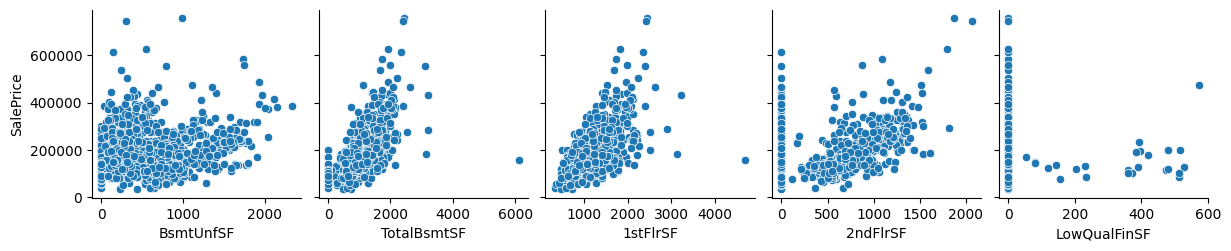

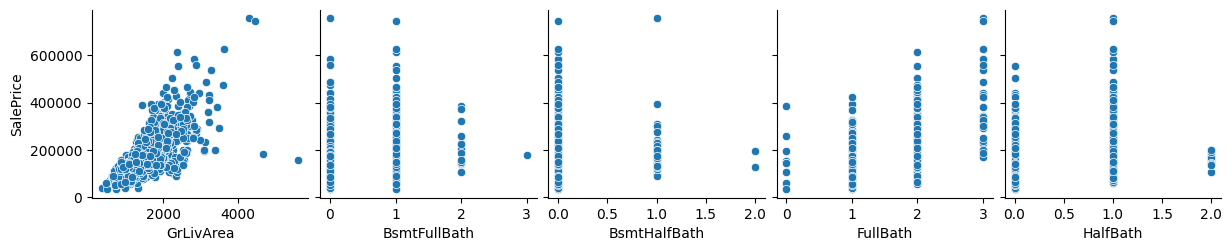

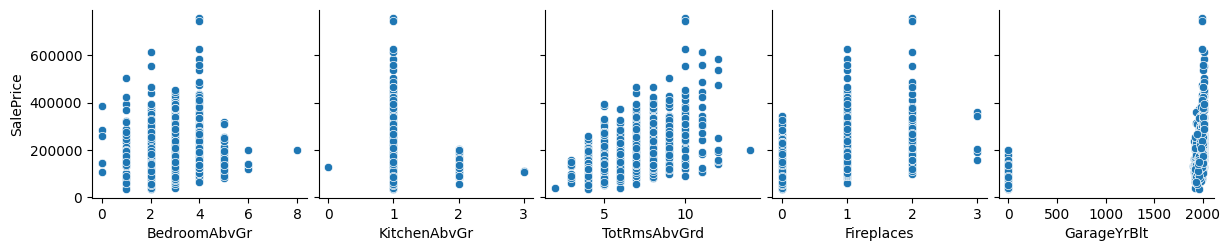

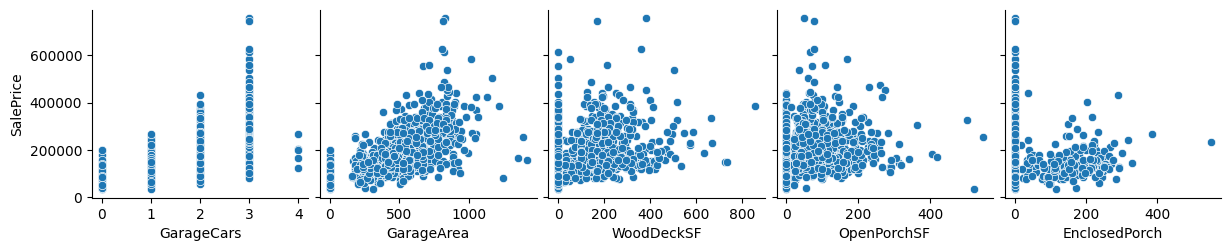

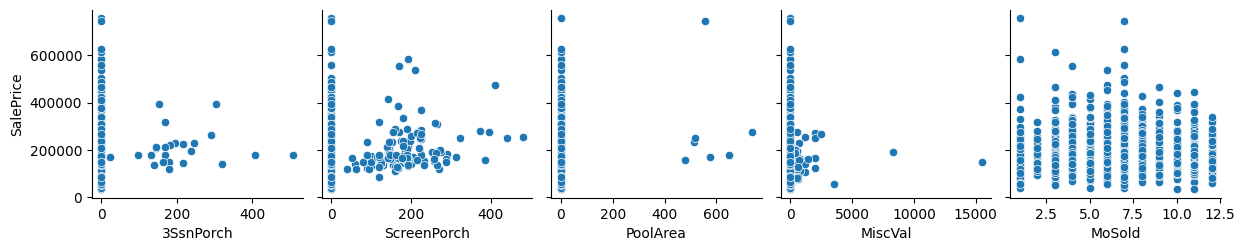

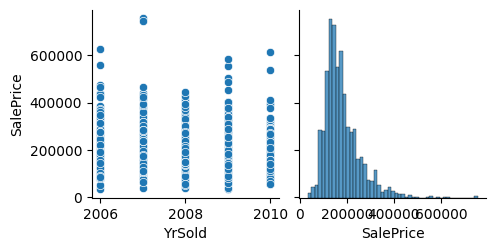

In [ ]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['SalePrice'])

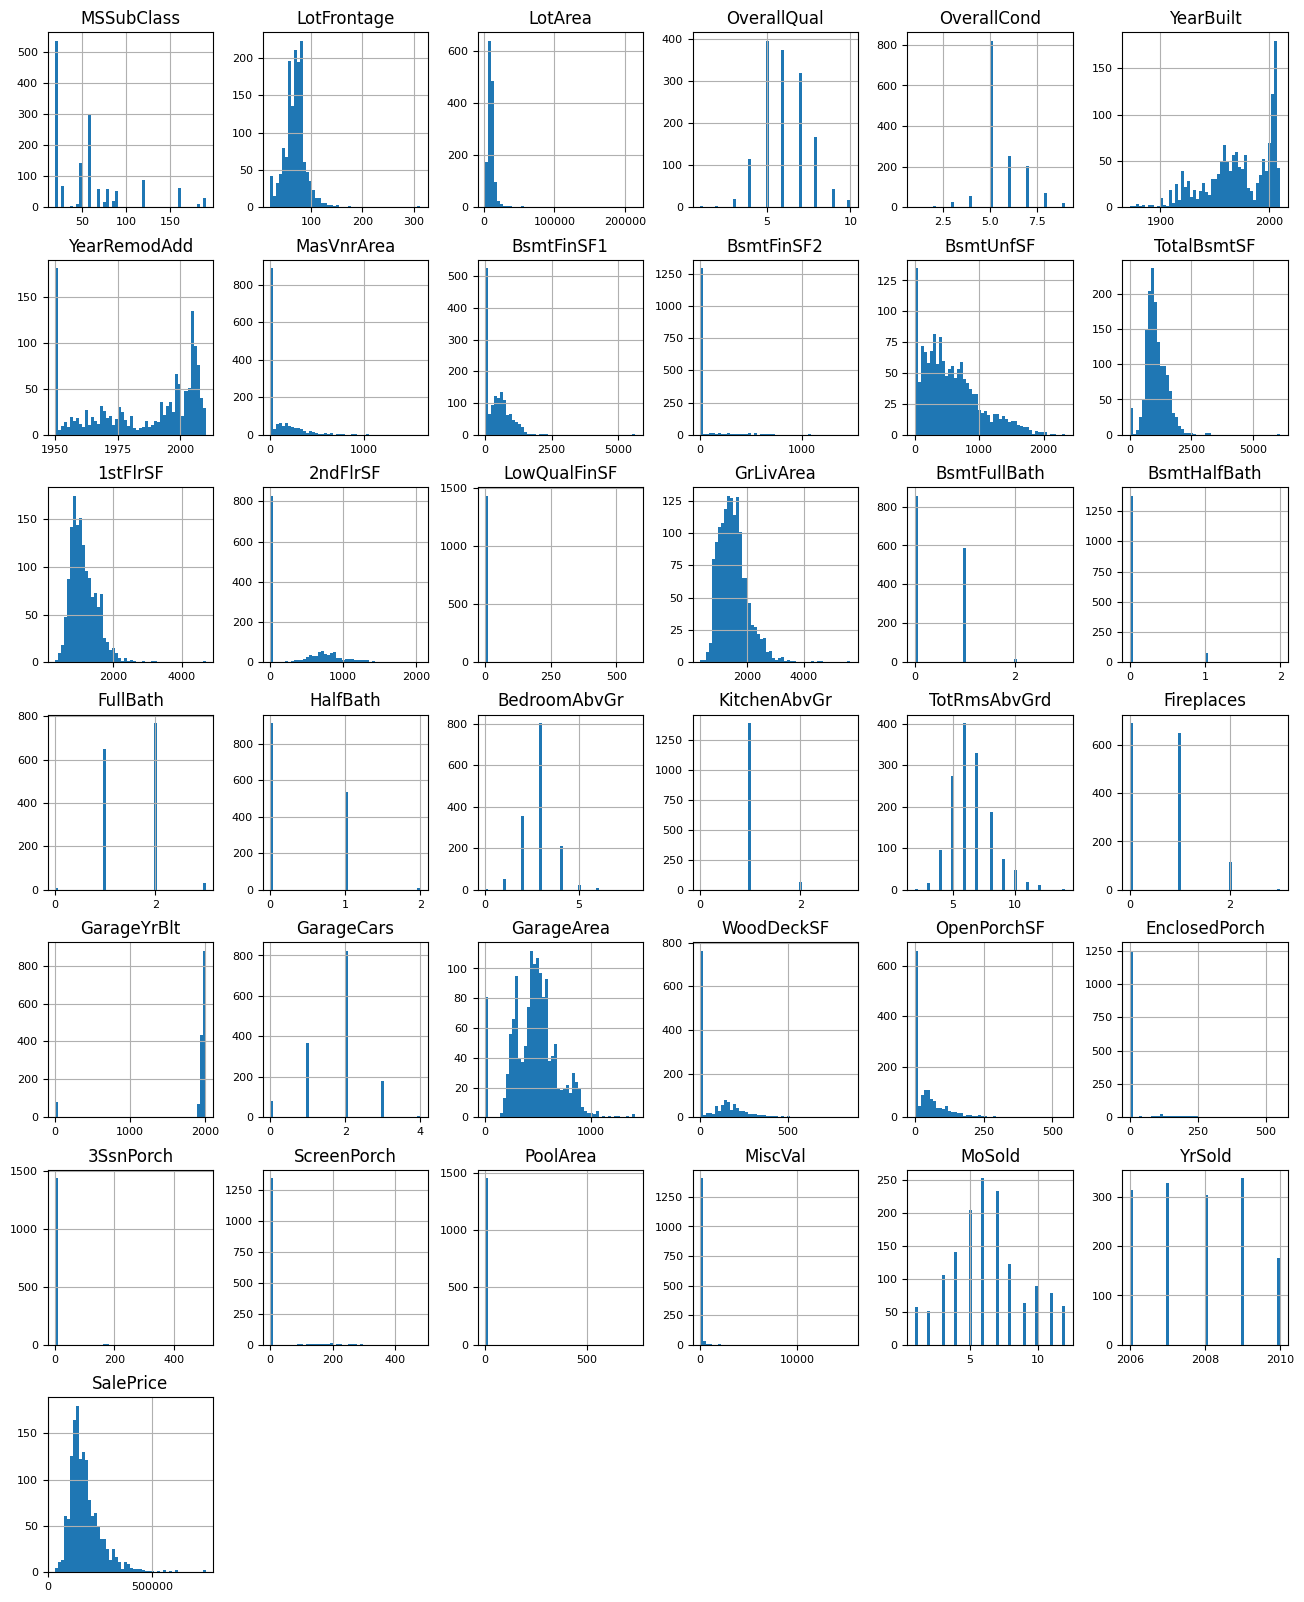

In [ ]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [ ]:
df_num_corr = df_num.corr()['SalePrice'][:-1] # -1 because the latest row is SalePrice
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(golden_features_list), golden_features_list))

There is 10 strongly correlated values with SalePrice:
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


<p align="justify"> Dari Hasil EDA dengan variabel numerik didapatkan 10 variabel dengan korelasi terkuat ke variabel target yaitu 'SalePrice'.

Berikut list variabel berkorelasi kuat ke target:   
['YearRemodAdd',
 'YearBuilt',
 'TotRmsAbvGrd',
 'FullBath',
 '1stFlrSF',
 'TotalBsmtSF',
 'GarageArea',
 'GarageCars',
 'GrLivArea',
 'OverallQual']


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Fungsi untuk membuat scatter plot interaktif
def plot_scatter_interactive(df, features_list, target, rows=3, cols=4):
    # Hitung jumlah maksimum plot
    max_plots = rows * cols

    # Buat layout subplot
    fig = make_subplots(
        rows=rows, cols=cols,
        subplot_titles=features_list[:max_plots]
    )

    # Loop melalui fitur dalam daftar
    for i, feature in enumerate(features_list[:max_plots]):
        # Menentukan baris dan kolom subplot
        row = (i // cols) + 1
        col = (i % cols) + 1

        # Tambahkan scatter plot ke subplot
        fig.add_trace(
            go.Scatter(
                x=df[feature],
                y=df[target],
                mode='markers',
                marker=dict(size=6, opacity=0.7),
                name=feature
            ),
            row=row, col=col
        )

    # Update layout
    fig.update_layout(
        height=rows * 300,  # Tinggi berdasarkan jumlah baris
        width=cols * 500,   # Lebar berdasarkan jumlah kolom
        title_text=f"Scatter Plots: Features vs {target}",
        showlegend=False
    )

    # Tampilkan plot
    fig.show()

# Contoh penggunaan
plot_scatter_interactive(df_train, golden_features_list.index, 'SalePrice', rows=3, cols=4)


- Kualitas Keseluruhan (OverallQual): Semakin tinggi kualitas keseluruhan sebuah rumah, semakin tinggi pula harga jualnya. Ini menunjukkan bahwa pembeli cenderung lebih memilih rumah dengan kualitas konstruksi, bahan bangunan, dan kondisi yang lebih baik.
- Luas Ruang Tinggal (GrLivArea), Luas Basement (TotalBsmtSF), Luas Lantai Pertama (1stFlrSF): Semakin luas rumah, baik dari segi ruang tinggal, luas basement, atau luas lantai pertama, maka harga jualnya cenderung semakin tinggi. Ini menunjukkan bahwa pembeli umumnya menyukai rumah dengan ruang yang lebih luas dan lapang.
- Jumlah Kamar Mandi (FullBath): Semakin banyak kamar mandi dalam sebuah rumah, semakin tinggi pula harga jualnya. Ini mengindikasikan bahwa keberadaan kamar mandi yang cukup dianggap sebagai fasilitas penting dan meningkatkan nilai jual sebuah rumah.
- Jumlah Kamar (TotRmsAbvGrd): Jumlah total kamar di atas tanah juga memiliki korelasi positif dengan harga jual. Semakin banyak kamar, semakin tinggi nilai jual rumah tersebut.
- Tahun Dibangun (YearBuilt), Tahun Renovasi (YearRemodAdd), Kapasitas Garasi (GarageCars), Luas Garasi (GarageArea): Fitur-fitur ini menunjukkan hubungan yang lebih lemah atau bahkan tidak ada korelasi dengan harga jual. Artinya, faktor-faktor seperti tahun pembangunan, renovasi, kapasitas garasi, dan luas garasi mungkin tidak sekuat pengaruhnya terhadap harga jual dibandingkan dengan faktor-faktor lainnya.

### Korelasi antar Variabel Numerik

Text(0.5, 1.0, 'Korelasi antar variabel X')

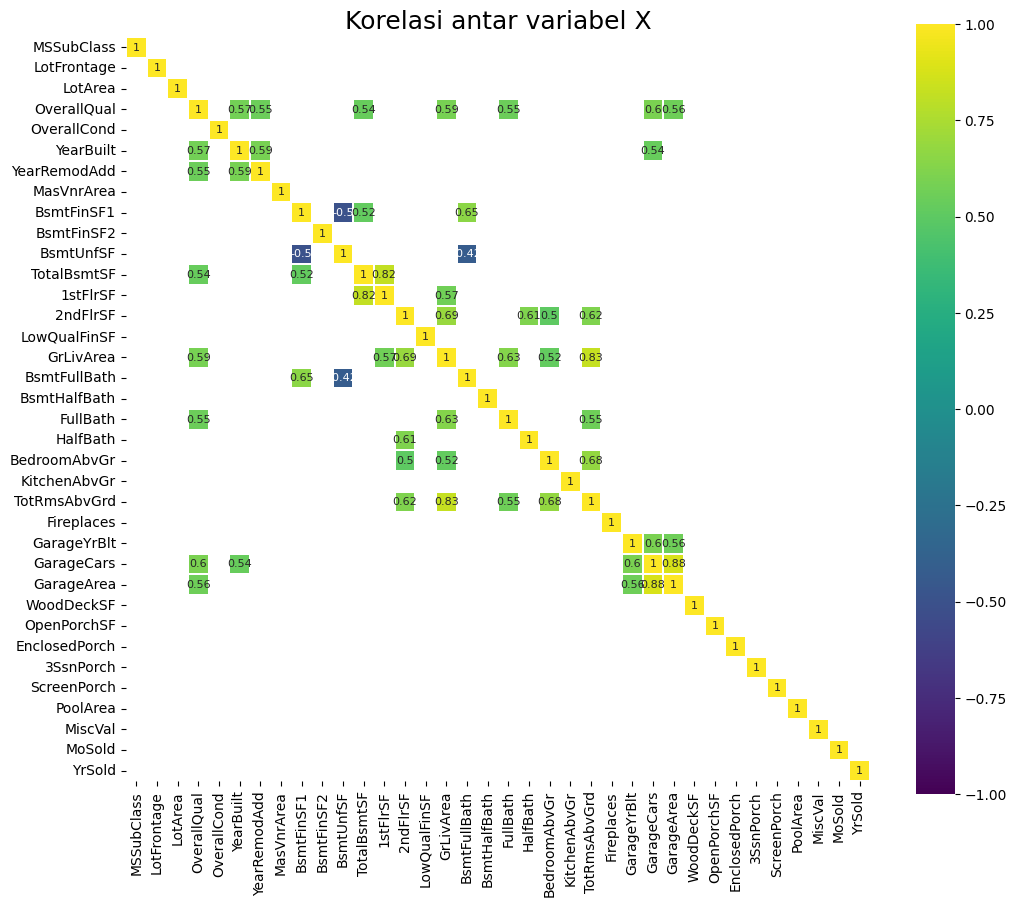

In [ ]:
corr = df_num.drop('SalePrice', axis=1).corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)],
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);
plt.title('Korelasi antar variabel X', fontsize=18, color='black', loc='center')

Terlihat beberapa variabel X yang memiliki korelasi tinggi antara satu dengan yang lain. Hal ini dapat menyebabkan multikolinearitas saat memebuat model regresi.

Correlation plot ini sangat berguna untuk tahapan pre-modeling sebagai refrensi untuk seleksi fitur, VIF, dll. Pemilihan fitur yang relevan untuk model, transformasi data, dll akan dilakukan pada tahapaan lebih lanjut.

## Variabel Kategorik

In [ ]:
categorical_feature

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [ ]:
import plotly.express as px
import plotly.subplots as sp
from plotly.graph_objects import Bar

# Fungsi untuk membuat bar plot distribusi kategori interaktif
def plot_categorical_distribution_interactive(df, categorical_features, rows=11, cols=4):
    # Hitung jumlah plot maksimum
    max_plots = rows * cols

    # Buat subplot grid
    fig = sp.make_subplots(rows=rows, cols=cols, subplot_titles=categorical_features[:max_plots])

    for i, col in enumerate(categorical_features[:max_plots]):
        # Hitung distribusi kategori
        category_counts = df[col].value_counts().reset_index()
        category_counts.columns = [col, 'count']

        # Tambahkan bar chart untuk setiap kategori ke subplot
        fig.add_trace(
            Bar(x=category_counts[col], y=category_counts['count'], name=col),
            row=(i // cols) + 1,
            col=(i % cols) + 1
        )

    # Update layout
    fig.update_layout(
        height=rows * 300,  # Sesuaikan tinggi berdasarkan jumlah baris
        width=cols * 500,   # Sesuaikan lebar berdasarkan jumlah kolom
        title_text="Categorical Feature Distribution",
        showlegend=False
    )

    # Tampilkan subplot interaktif
    fig.show()

# Contoh penggunaan
plot_categorical_distribution_interactive(df_train, categorical_feature)

Analisis Lebih Lanjut (Per Variabel):

- MMSZoning: Kategori 'RL' mendominasi, menunjukkan mayoritas properti berada di zona perumahan rendah densitas.
- Street: Hampir semua properti memiliki jalan berjenis 'Pave' (aspal), menunjukkan faktor aksesibilitas yang seragam.
- Alley: Sebagian besar properti tidak memiliki akses gang ('None'), menandakan gang mungkin bukan faktor utama dalam penentuan harga.
- LotShape: Bentuk lot 'Reg' (regular) lebih dominan dibanding bentuk yang tidak beraturan, menunjukkan preferensi terhadap lot berbentuk standar.
- LandContour: Kategori 'Lvl' (level) mendominasi, menunjukkan lahan datar lebih umum.
- Utilities: Hampir semua properti memiliki utilitas lengkap ('AllPub'), yang mungkin menjadi standar di area ini.
- LotConfig: Sebagian besar properti memiliki konfigurasi 'Inside', menunjukkan banyak properti di dalam lot biasa.
- LandSlope: Mayoritas lahan memiliki kemiringan 'Gtl' (gentle slope), menunjukkan preferensi terhadap lahan yang relatif rata.
- Neighborhood: Beberapa lingkungan memiliki jumlah properti yang jauh lebih banyak ('NAmes' dan 'CollgCr'), yang mungkin menunjukkan lingkungan populer.
- Condition1 & Condition2: Sebagian besar properti tidak memiliki kondisi khusus, menekankan normalitas pada lokasi properti.
BldgType: Tipe bangunan '1Fam' (rumah keluarga tunggal) paling dominan, menunjukkan preferensi untuk rumah pribadi.
- HouseStyle: Gaya '1Story' paling banyak, menunjukkan tren untuk rumah satu lantai.
- RoofStyle & RoofMatl: Atap 'Gable' dan material 'CompShg' mendominasi, menunjukkan keseragaman dalam desain atap.
- Exterior1st & Exterior2nd: Material eksterior 'VinylSd' lebih umum, menunjukkan preferensi terhadap bahan tersebut.
- MasVnrType: Banyak properti tidak memiliki veneer ('None'), atau menggunakan 'BrkFace'.
- ExterQual & ExterCond: Kualitas eksterior kebanyakan 'TA' (Typical/Average), menunjukkan standar kualitas yang seragam.
- Foundation: Fondasi 'PConc' lebih umum, menunjukkan preferensi terhadap material beton pracetak.
- BsmtQual & BsmtCond: Sebagian besar basement berkualitas 'TA' dengan kondisi rata-rata.
- BsmtExposure: Basement yang tidak terekspos ('No') lebih banyak, menunjukkan desain tertutup lebih umum.
- Heating & HeatingQC: Pemanas 'GasA' dan kualitas 'Ex' (Excellent) lebih banyak ditemukan.
- CentralAir: Hampir semua properti memiliki AC sentral ('Y'), menunjukkan kenyamanan modern yang penting.
- Electrical: Sistem listrik 'SBrkr' mendominasi, kemungkinan sebagai standar di area ini.
- KitchenQual: Mayoritas dapur memiliki kualitas 'TA', menunjukkan standar rata-rata.
- Functional: Sebagian besar properti berfungsi secara 'Typ' (Typical), menunjukkan kondisi fungsional yang baik.
- FireplaceQu: Banyak properti tidak memiliki perapian ('None'), yang bisa mencerminkan gaya hidup tertentu.
- GarageType, GarageFinish & GarageQual: Garasi 'Attchd' lebih umum, selesai dengan 'Unf', dan dengan kualitas rata-rata.
- PavedDrive: Mayoritas memiliki jalan masuk yang beraspal ('Y'), mendukung aksesibilitas properti.
- PoolQC & Fence: Sebagian besar properti tidak memiliki kolam renang atau pagar, menunjukkan fitur ini bukan prioritas utama.
- MiscFeature: Sebagian besar properti tidak memiliki fitur tambahan, menandakan fitur ini jarang dipertimbangkan.
- SaleType: Tipe penjualan 'WD' lebih umum, menunjukkan transaksi normal lebih banyak.
- SaleCondition: Kondisi penjualan 'Normal' mendominasi, menunjukkan kebanyakan properti dijual dalam kondisi standar.

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Fungsi untuk membuat bar plot interaktif dengan pengaturan baris dan kolom
def plot_categorical_vs_saleprice_bar(df, categorical_features, target, rows=11, cols=4):
    # Hitung jumlah maksimum plot yang akan ditampilkan
    max_plots = rows * cols

    # Buat layout subplot
    fig = make_subplots(
        rows=rows, cols=cols,
        subplot_titles=categorical_features[:max_plots]
    )

    # Loop melalui fitur dalam daftar
    for i, feature in enumerate(categorical_features[:max_plots]):
        # Menentukan baris dan kolom subplot
        row = (i // cols) + 1
        col = (i % cols) + 1

        # Hitung rata-rata SalePrice per kategori
        avg_saleprice = df.groupby(feature)[target].mean().reset_index()

        # Menambahkan bar plot ke subplot
        fig.add_trace(
            go.Bar(
                x=avg_saleprice[feature],
                y=avg_saleprice[target],
                name=feature
            ),
            row=row, col=col
        )

    # Update layout
    fig.update_layout(
        height=rows * 300,  # Tinggi berdasarkan jumlah baris
        width=cols * 500,   # Lebar berdasarkan jumlah kolom
        title_text=f"Bar Plots: Categorical Features vs {target}",
        showlegend=False
    )

    # Tampilkan plot
    fig.show()

# Contoh penggunaan
# Misalkan df_train adalah DataFrame yang berisi data dan 'SalePrice' adalah kolom target
categorical_features_list = df_train.select_dtypes(include=['object']).columns  # Menemukan fitur kategorikal
plot_categorical_vs_saleprice_bar(df_train, categorical_features_list, 'SalePrice')


- MSZoning: Zona seperti 'RL' dan 'FV' memiliki pengaruh positif terhadap harga jual, sementara 'RM' dan 'C (all)' berpengaruh negatif.
- Street: Jalan 'Pave' memiliki sedikit pengaruh positif dibandingkan 'Grvl'.
- Alley: Properti dengan gang 'Pave' memiliki pengaruh positif pada harga dibandingkan yang tanpa gang ('None').
- LotShape: Lot berbentuk 'Reg' memberikan kontribusi positif terhadap harga dibandingkan bentuk lainnya.
- LandContour: Kontur tanah 'Lvl' (level) berpengaruh positif signifikan dibanding kontur lain.
- Utilities: Properti dengan semua utilitas tersedia ('AllPub') cenderung bernilai lebih tinggi dibandingkan 'NoSewr'.
- LotConfig: Konfigurasi lot 'FR2' memiliki dampak positif yang besar dibandingkan konfigurasi lainnya.
- LandSlope: Lahan dengan kemiringan 'Gtl' (gentle) lebih positif dibandingkan 'Mod' atau 'Sev'.
- Neighborhood: Beberapa lingkungan seperti 'StoneBr' dan 'NridgHt' sangat berkorelasi positif dengan harga tinggi.
- Condition1 & Condition2: Kondisi seperti 'PosN' memiliki dampak positif yang kuat terhadap harga, sementara kondisi 'RRAe' atau 'RRNn' cenderung negatif.
- BldgType: Rumah '1Fam' memberikan kontribusi harga yang lebih positif dibandingkan tipe lain seperti 'Duplex' atau 'TwnhsE'.
- HouseStyle: Rumah '2Story' memiliki pengaruh positif lebih tinggi daripada '1Story'.
- RoofStyle & RoofMatl: Gaya atap 'Hip' dan material 'CompShg' memiliki pengaruh positif pada harga.
- Exterior1st & Exterior2nd: Bahan eksterior seperti 'Stone' atau 'ImStucc' memberikan kontribusi positif signifikan terhadap harga.
- MasVnrType: Properti dengan veneer batu ('Stone') memiliki dampak positif signifikan.
- ExterQual & ExterCond: Properti dengan kualitas eksterior 'Ex' memiliki dampak positif kuat pada harga.
- Foundation: Fondasi 'PConc' berpengaruh positif signifikan, sementara 'BrkTil' cenderung negatif.
- BsmtQual & BsmtCond: Basement berkualitas 'Ex' atau dalam kondisi 'TA' memiliki dampak positif pada harga.
- BsmtExposure: Basement dengan paparan 'Gd' atau 'Av' memberikan nilai tambah signifikan.
- Heating & HeatingQC: Pemanas dengan kualitas 'Ex' memiliki dampak positif yang sangat tinggi.
- CentralAir: Properti dengan AC sentral ('Y') memiliki pengaruh positif terhadap harga.
- Electrical: Sistem 'SBrkr' memberikan pengaruh positif lebih besar dibanding tipe lainnya.
- KitchenQual: Kualitas dapur 'Ex' berkontribusi paling besar pada harga tinggi.
Functional: Properti dengan fungsi 'Typ' memiliki dampak positif, sedangkan kategori 'Sev' sangat negatif.
- FireplaceQu: Properti dengan perapian berkualitas 'Ex' atau 'Gd' memiliki pengaruh positif signifikan.
GarageType, GarageFinish & GarageQual: Garasi 'Attchd', kualitas 'Ex', dan penyelesaian 'Fin' berkontribusi positif terhadap harga.
- PavedDrive: Properti dengan jalan masuk beraspal ('Y') memiliki dampak positif.
- PoolQC & Fence: Kolam berkualitas 'Ex' dan pagar berkategori 'GdPrv' memiliki pengaruh positif besar terhadap harga.
- MiscFeature: Fitur tambahan tertentu seperti 'TenC' memberikan dampak positif signifikan.
- SaleType: Properti yang dijual dengan tipe 'New' memiliki pengaruh positif paling besar.
- SaleCondition: Kondisi penjualan 'Partial' memiliki dampak positif besar pada harga dibandingkan kondisi lainnya.

---

Insight utama  
Properti dengan fitur premium atau kualitas tinggi seperti kolam renang, dapur berkualitas, material mahal, dan lokasi lingkungan elit cenderung memiliki harga jual yang lebih tinggi. Properti standar dengan fitur biasa cenderung berharga lebih rendah. Anda bisa menggunakan data ini untuk prediksi harga atau analisis tren lebih lanjut.

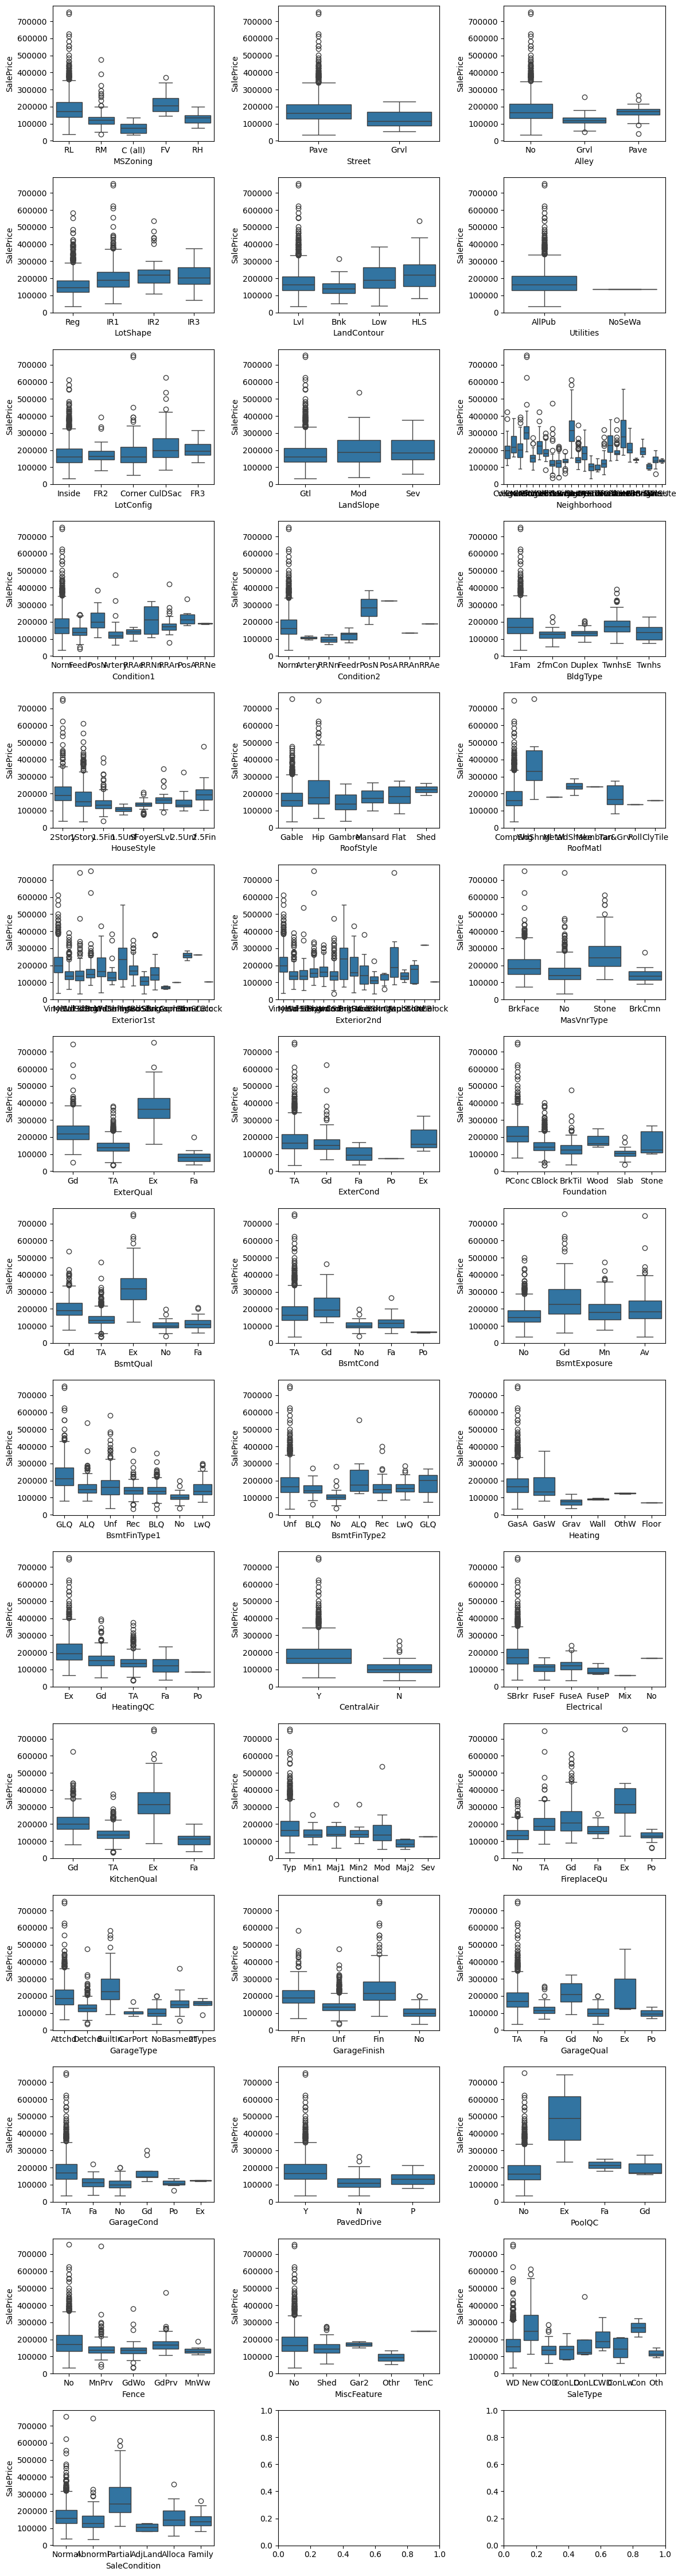

In [ ]:
li_cat_feats = list(categorical_feature)
nr_rows = 15
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4,nr_rows*3))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):
        i = r*nr_cols+c
        if i < len(li_cat_feats):
            sns.boxplot(x=li_cat_feats[i], y='SalePrice', data=df_train, ax = axs[r][c])

plt.tight_layout()
plt.show()

### Kesimpulan

**Variabel Penting untuk Dimanfaatkan dalam Model**
- ExterQual  

Properti dengan kualitas eksterior 'Ex' memiliki nilai rata-rata SalePrice yang jauh lebih tinggi daripada kategori lainnya. Variabel ini harus dimasukkan karena pengaruhnya sangat kuat.
- KitchenQual  

Kategori 'Ex' dan 'Gd' memiliki hubungan positif kuat terhadap SalePrice. Variabel ini penting untuk mencerminkan kualitas dapur.
- Neighborhood

Beberapa lingkungan seperti 'NoRidge', 'NridgHt', dan 'StoneBr' memiliki rata-rata harga properti yang tinggi. Variabel ini penting karena mencerminkan lokasi properti.
- GarageFinish

Properti dengan garasi yang selesai ('Fin' atau 'RFn') menunjukkan peningkatan harga properti. Gunakan variabel ini untuk mencerminkan kualitas garasi.
- BsmtQual

Properti dengan kategori 'Ex' atau 'Gd' menunjukkan nilai rata-rata SalePrice yang lebih tinggi. Variabel ini mencerminkan kualitas basement.
- FireplaceQu

Properti dengan kategori 'Ex' memiliki harga rata-rata lebih tinggi, mencerminkan pentingnya keberadaan perapian berkualitas tinggi.
- MasVnrType

Properti dengan veneer batu ('Stone') memiliki rata-rata harga lebih tinggi dibandingkan kategori lainnya.
- Condition1

Kondisi properti seperti 'PosN' dan 'PosA' menunjukkan dampak positif terhadap harga.
- CentralAir

Properti dengan AC sentral ('Y') memiliki harga lebih tinggi, meskipun efeknya lebih kecil.
- SaleCondition

Properti yang dijual dalam kondisi 'Partial' menunjukkan nilai rata-rata harga yang lebih tinggi.


**Variabel yang Kurang Penting atau Dapat Dihapus**
- Street

Tidak ada perbedaan signifikan antara kategori 'Pave' dan 'Grvl'. Variabel ini dapat dihapus karena tidak informatif.
- Utilities:

Hampir semua properti berada dalam kategori 'AllPub', sehingga tidak memberikan variasi yang cukup untuk model.
- RoofMatl:

Meskipun ada beberapa variasi, hubungan antara material atap dengan SalePrice tidak terlalu signifikan.
- LandSlope:

Pengaruh kategori ini terhadap harga sangat kecil, sehingga dapat dihapus dari model.
- MiscFeature:

Sebagian besar kategori adalah 'None', sehingga tidak informatif untuk model regresi.
- Alley:

Kategori 'None' mendominasi, dan variabel ini tidak terlalu relevan dalam memprediksi harga properti.

#<font color="BEE7FF"> **Pre-Modeling**

## Transformasi Log

In [ ]:
# Untuk kemudahan transformasi variabel dan data scaling, data latih dan data uji akan digabungkan menjadi df
df_train['is_train'] = 1
df_test['is_train'] = 0
df = pd.concat([df_train, df_test], ignore_index=True)
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave    No      Reg   
1          20       RL         80.0     9600   Pave    No      Reg   
2          60       RL         68.0    11250   Pave    No      IR1   
3          70       RL         60.0     9550   Pave    No      IR1   
4          60       RL         84.0    14260   Pave    No      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd         No   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng         No   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ       706.0          Unf         0.0      150.0        856.0   
1          ALQ       978.0          Unf         0.0      284.0       1262.0   
2          GLQ       486.0          Unf         0.0      434.0        920.0   
3          ALQ       216.0          Unf         0.0      540.0        756.0   
4          GLQ       655.0          Unf         0.0      490.0       1145.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710           1.0           0.0         2         1             3   
1       1262           0.0           1.0         2         0             3   
2       1786           1.0           0.0         2         1             3   
3       1717           1.0           0.0         1         0             3   
4       2198           1.0           0.0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0          No   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd             7        Typ           

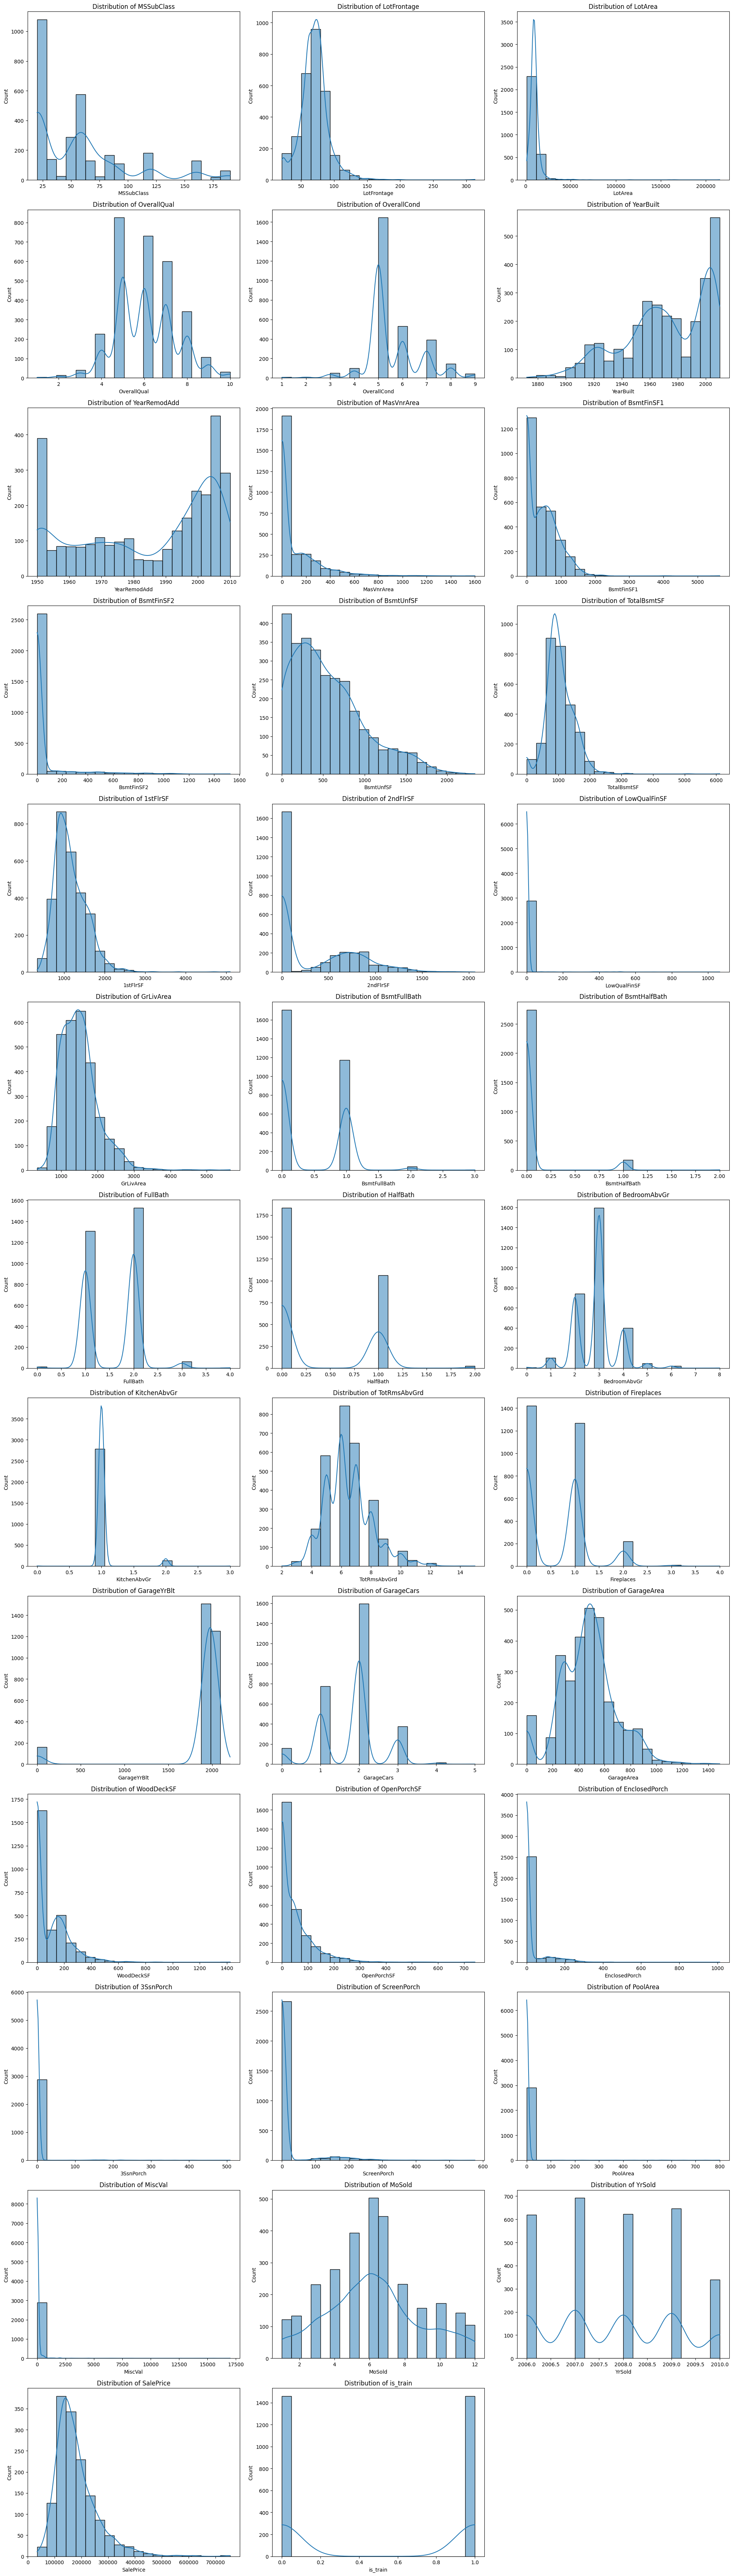

In [ ]:
# Histogram Density Plot
num_var = df.select_dtypes(include=['int64', 'float64'])

# Membuat histogram dan density plot untuk semua kolom numerik
plt.figure(figsize=(20, 70))  # Atur ukuran kanvas besar untuk semua plot
for i, col in enumerate(num_var.columns, 1):  # Iterasi setiap kolom numerik
    plt.subplot((len(num_var.columns) + 2) // 3, 3, i)  # Grid dengan 3 kolom per baris
    sns.histplot(data=num_var, x=col, kde=True, bins=20)  # Histogram + KDE
    plt.title(f'Distribution of {col}', fontsize=12)
    plt.tight_layout()

plt.show()

In [ ]:
# Menghitung skewness dan kurtosis
skew_kurt = pd.DataFrame({
    'Skewness': num_var.skew(),
    'Kurtosis': num_var.kurt()
})

# Menampilkan DataFrame skewness dan kurtosis
skew_kurt

Skewness    Kurtosis
MSSubClass      1.376165    1.457827
LotFrontage     1.456919   12.666954
LotArea        12.829025  264.952310
OverallQual     0.197212    0.067219
OverallCond     0.570605    1.479447
YearBuilt      -0.600114   -0.511317
YearRemodAdd   -0.451252   -1.346431
MasVnrArea      2.614936    9.336415
BsmtFinSF1      1.425963    6.904047
BsmtFinSF2      4.148275   18.844397
BsmtUnfSF       0.919812    0.403503
TotalBsmtSF     1.157489    9.122827
1stFlrSF        1.470360    6.956479
2ndFlrSF        0.862118   -0.422261
LowQualFinSF   12.094977  174.932812
GrLivArea       1.270010    4.121604
BsmtFullBath    0.625153   -0.734512
BsmtHalfBath    3.933616   14.861472
FullBath        0.167692   -0.538129
HalfBath        0.694924   -1.033446
BedroomAbvGr    0.326492    1.941404
KitchenAbvGr    4.304467   19.777937
TotRmsAbvGrd    0.758757    1.169064
Fireplaces      0.733872    0.076424
GarageYrBlt    -3.908213   13.341783
GarageCars     -0.219694    0.236592
GarageArea      0.239380    0.936809
WoodDeckSF      1.843380    6.741550
OpenPorchSF     2.536417   10.937353
EnclosedPorch   4.005950   28.377909
3SsnPorch      11.381914  149.409834
ScreenPorch     3.948723   17.776704
PoolArea       16.907017  298.633144
MiscVal        21.958480  564.074582
MoSold          0.195985   -0.454337
YrSold          0.132467   -1.155147
SalePrice       1.882876    6.536282
is_train       -0.000686   -2.001371

In [ ]:
# Definisikan kolom yang membutuhkan transformasi log
log_transform_vars = [
    'LotArea', 'LowQualFinSF', 'BsmtFinSF2', 'BsmtHalfBath',
    'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
    'PoolArea', 'MiscVal', 'OpenPorchSF', 'SalePrice'
]

In [ ]:
# Melakukan transformasi log dan menyimpannya dengan nama kolom baru (misalnya, 'LotFrontage_Log')
for var in log_transform_vars:
    # Melakukan log transformasi pada kolom dan menambah '_Log' pada nama kolom
    df[f'{var}_Log'] = np.log1p(df[var])  # Menggunakan log1p untuk menangani nilai 0 (log(0) tidak terdefinisi)

    # Menghapus kolom asli setelah transformasi
    df.drop(columns=[var], inplace=True)

# Menampilkan beberapa baris pertama dari df untuk melihat hasilnya
df.head()

MSSubClass MSZoning  LotFrontage Street Alley LotShape LandContour  \
0          60       RL         65.0   Pave    No      Reg         Lvl   
1          20       RL         80.0   Pave    No      Reg         Lvl   
2          60       RL         68.0   Pave    No      IR1         Lvl   
3          70       RL         60.0   Pave    No      IR1         Lvl   
4          60       RL         84.0   Pave    No      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5       2003          2003     Gable   
1     1Story            6            8       1976          1976     Gable   
2     2Story            7            5       2001          2002     Gable   
3     2Story            7            5       1915          1970     Gable   
4     2Story            8            5       2000          2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1  CompShg     MetalSd     MetalSd         No         0.0        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3  CompShg     Wd Sdng     Wd Shng         No         0.0        TA        TA   
4  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ       706.0   
1     CBlock       Gd       TA           Gd          ALQ       978.0   
2      PConc       Gd       TA           Mn          GLQ       486.0   
3     BrkTil       TA       Gd           No          ALQ       216.0   
4      PConc       Gd       TA           Av          GLQ       655.0   

  BsmtFinType2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir  \
0          Unf      150.0        856.0    GasA        Ex          Y   
1          Unf      284.0       1262.0    GasA        Ex          Y   
2          Unf      434.0        920.0    GasA        Ex          Y   
3          Unf      540.0        756.0    GasA        Gd          Y   
4          Unf      490.0       1145.0    GasA        Ex          Y   

  Electrical  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  \
0      SBrkr       856       854       1710           1.0         2         1   
1      SBrkr      1262         0       1262           0.0         2         0   
2      SBrkr       920       866       1786           1.0         2         1   
3      SBrkr       961       756       1717           1.0         1         0   
4      SBrkr      1145      1053       2198           1.0         2         1   

   BedroomAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             3          Gd             8        Typ           0          No   
1             3          TA             6        Typ           1          TA   
2             3          Gd             6        Typ           1          TA   
3             3          Gd             7        Typ           1          Gd   
4             4          Gd             9        Typ           1          TA   

  GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual  \
0     Attchd       2003.0          RFn         2.0       548.0         TA   
1     Attchd       1976.0          RFn         2.0       460.0         TA   
2     Attchd       2001.0          RFn         2.0       608.0         TA   
3  

## Encoding

In [ ]:
# Ordinal Encoding
ordinal_features = [
    'LotShape', 'LandContour', 'LandSlope', 'ExterQual',
    'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
    'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'Functional', 'FireplaceQu',
    'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence'
]

ordinal_categories = [
    ['IR3', 'IR2', 'IR1', 'Reg'],                             # LotShape
    ['Low', 'Bnk', 'Lvl', 'HLS'],                             # LandContour
    ['Sev', 'Mod', 'Gtl'],                                    # LandSlope
    ['No', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],                                 # ExterQual
    ['No', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],                           # ExterCond
    ['No', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],                           # BsmtQual
    ['No', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],                           # BsmtCond
    ['No', 'Mn', 'Av', 'Gd'],                          # BsmtExposure
    ['No', 'Unf', 'BLQ', 'LwQ', 'Rec', 'ALQ', 'GLQ'],        # BsmtFinType1
    ['No', 'Unf', 'BLQ', 'LwQ', 'Rec', 'ALQ', 'GLQ'],        # BsmtFinType2
    ['No', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],                           # HeatingQC
    ['No', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],                                 # KitchenQual
    ['No', 'Sev', 'Min2', 'Min1', 'Mod', 'Maj2', 'Maj1', 'Typ'],    # Functional
    ['No', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],                    # FireplaceQu
    ['No', 'Unf', 'RFn', 'Fin'],                             # GarageFinish
    ['No', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],                    # GarageQual
    ['No', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],                    # GarageCond
    ['N', 'P', 'Y'],                                          # PavedDrive
    ['No', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],                                # PoolQC
    ['No', 'MnWw', 'MnPrv', 'GdPrv', 'GdWo']                # Fence
]

encoder = OrdinalEncoder(categories=ordinal_categories)
df[ordinal_features] = encoder.fit_transform(df[ordinal_features])

In [ ]:
# One-Hot Encoding
df['MSSubClass'] = df['MSSubClass'].astype(object)
nominal_features = [
    'MSSubClass', 'MSZoning', 'Street', 'Alley', 'Utilities', 'LotConfig', 'Neighborhood', 'Condition1',
    'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
    'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical',
    'GarageType', 'MiscFeature', 'SaleType', 'SaleCondition']

df = pd.get_dummies(df, columns=nominal_features, drop_first=True)


bool_columns = df.select_dtypes(include=['bool']).columns

for col in bool_columns:
    df[col] = df[col].astype(int)

## Features Scalling

In [ ]:
# Scaling data
scale_var = df.select_dtypes(include=['float64', 'int64']).columns
scale_var = scale_var.drop(['is_train', 'SalePrice_Log'])

scaler = StandardScaler()
df[scale_var] = scaler.fit_transform(df[scale_var])

In [ ]:
df.head()

LotFrontage  LotShape  LandContour  LandSlope  OverallQual  OverallCond  \
0    -0.228922  0.701900     0.099645    0.21626     0.646183    -0.507284   
1     0.460791  0.701900     0.099645    0.21626    -0.063185     2.188279   
2    -0.090980 -1.052249     0.099645    0.21626     0.646183    -0.507284   
3    -0.458827 -1.052249     0.099645    0.21626     0.646183    -0.507284   
4     0.644715 -1.052249     0.099645    0.21626     1.355551    -0.507284   

   YearBuilt  YearRemodAdd  MasVnrArea  ExterQual  ExterCond  BsmtQual  \
0   1.046258      0.896833    0.529034   1.039805  -0.230047  0.577094   
1   0.154764     -0.395604   -0.567016  -0.683756  -0.230047  0.577094   
2   0.980221      0.848965    0.338903   1.039805  -0.230047  0.577094   
3  -1.859351     -0.682812   -0.567016  -0.683756  -0.230047 -0.527521   
4   0.947203      0.753229    1.390216   1.039805  -0.230047  0.577094   

   BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtUnfSF  \
0  0.141836     -0.627142      1.168271    0.581145     -0.295267  -0.934165   
1  0.141836      2.258765      0.699324    1.178255     -0.295267  -0.629284   
2  0.141836      0.334827      1.168271    0.098189     -0.295267  -0.287999   
3  1.881417     -0.627142      0.699324   -0.494529     -0.295267  -0.046824   
4  0.141836      1.296796      1.168271    0.469187     -0.295267  -0.160586   

   TotalBsmtSF  HeatingQC  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  \
0    -0.443078   0.885619 -0.773861  1.207379   0.413547      1.087334   
1     0.477463   0.885619  0.261075 -0.785025  -0.471891     -0.818929   
2    -0.297968   0.885619 -0.610718  1.235375   0.563755      1.087334   
3    -0.669812  -0.158453 -0.506205  0.978742   0.427382      1.087334   
4     0.212184   0.885619 -0.037170  1.671651   1.378042      1.087334   

   FullBath  HalfBath  BedroomAbvGr  KitchenQual  TotRmsAbvGrd  Functional  \
0  0.781366  1.232599      0.169927     0.737021      0.986849    0.257692   
1  0.781366 -0.756321      0.169927    -0.766379     -0.287758    0.257692   
2  0.781366  1.232599      0.169927     0.737021     -0.287758    0.257692   
3 -1.027363 -0.756321      0.169927     0.737021      0.349546    0.257692   
4  0.781366  1.232599      1.385655     0.737021      1.624153    0.257692   

   Fireplaces  FireplaceQu  GarageYrBlt  GarageFinish  GarageCars  GarageArea  \
0   -0.924311    -0.978830     0.295002      0.316551    0.307040    0.349364   
1    0.623632     0.682014     0.234950      0.316551    0.307040   -0.058991   
2    0.623632     0.682014     0.290554      0.316551    0.307040    0.627787   
3    0.623632     1.235629     0.283882     -0.798060    1.619264    0.785561   
4    0.623632     0.682014     0.288330      0.316551    1.619264    1.685798   

   GarageQual  GarageCond  PavedDrive  WoodDeckSF    PoolQC     Fence  \
0    0.278091    0.268343     0.31503   -0.740760 -0.056542 -0.464548   
1    0.278091    0.268343     0.31503    1.614879 -0.056542 -0.464548   
2    0.278091    0.268343     0.31503   -0.740760 -0.056542 -0.464548   
3    0.278091    0.268343     0.31503   -0.740760 -0.056542 -0.464548   
4    0.278091    0.268343     0.31503    0.776967 -0.056542 -0.464548   

     MoSold    YrSold  is_train  LotArea_Log  LowQualFinSF_Log  \
0 -1.552184  0.157646         1    -0.103719         -0.116932   
1 -0.446925 -0.602962         1     0.146544         -0.116932   
2  1.026753  0.157646         1     0.457629         -0.116932   
3 -1.552184 -1.363569         1     0.136301         -0.116932   
4  2.132012  0.157646         1     0.922662         -0.116932   

   BsmtFinSF2_Log  BsmtHalfBath_Log  KitchenAbvGr_Log  EnclosedPorch_Log  \
0       -0.362565         -0.251544         -0.200513          -0.427545   
1       -0.362565          3.888856         -0.200513          -0.427545   
2       -0.362565         -0.251544         -0.200513          -0.427545   
3       -0.362565         -0.251544         -0.200513           2.7

## Feature Selection

In [ ]:
# Hapus kolom non-numerik seperti 'Id', 'is_train', dll.
vif_var = df.drop(['is_train', 'SalePrice_Log'], axis=1, errors='ignore')

# Menggunakan add_constant untuk menambahkan kolom konstanta
X = add_constant(vif_var)

vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data = vif_data.sort_values(by='VIF', ascending=False)
vif_data

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning:

divide by zero encountered in scalar divide



Feature         VIF
155         Exterior1st_No         inf
125        BldgType_Duplex         inf
170         Exterior2nd_No         inf
65           MSSubClass_90         inf
23               GrLivArea  824.120203
22                2ndFlrSF  586.002594
21                1stFlrSF  500.593638
33             GarageYrBlt  119.944828
135        RoofStyle_Gable  103.178047
202          GarageType_No  102.685502
175    Exterior2nd_VinylSd  102.099002
137          RoofStyle_Hip   97.081726
159    Exterior1st_VinylSd   96.512695
140       RoofMatl_CompShg   63.586384
169    Exterior2nd_MetalSd   63.429897
203         MiscFeature_No   60.883329
154    Exterior1st_MetalSd   59.948110
186           Heating_GasA   48.212015
167    Exterior2nd_HdBoard   47.022860
152    Exterior1st_HdBoard   46.716286
129      HouseStyle_1Story   45.972902
212           SaleType_New   45.425360
220  SaleCondition_Partial   43.338768
176    Exterior2nd_Wd Sdng   43.225894
166    Exterior2nd_CmentBd   41.987006
160    Exterior1st_Wd Sdng   41.256005
151    Exterior1st_CemntBd   40.487870
19             TotalBsmtSF   40.473002
197      GarageType_Attchd   38.101181
74             MSZoning_RL   37.868844
144       RoofMatl_Tar&Grv   37.866353
16              BsmtFinSF1   37.170771
18               BsmtUnfSF   34.905739
127        BldgType_TwnhsE   34.323710
132      HouseStyle_2Story   32.651476
179          MasVnrType_No   31.538845
201      GarageType_Detchd   30.751884
172    Exterior2nd_Plywood   30.750278
187           Heating_GasW   30.277145
66          MSSubClass_120   28.317928
68          MSSubClass_160   27.855718
178     MasVnrType_BrkFace   27.744516
124        BldgType_2fmCon   27.604368
70          MSSubClass_190   27.441425
205       MiscFeature_Shed   27.381700
75             MSZoning_RM   25.428926
156    Exterior1st_Plywood   24.707382
134        HouseStyle_SLvl   24.141568
96      Neighborhood_NAmes   22.893511
60           MSSubClass_60   20.921475
63           MSSubClass_80   20.157787
54             MiscVal_Log   19.479232
101   Neighborhood_OldTown   18.430489
126         BldgType_Twnhs   17.129185
38              GarageCond   16.481590
59           MSSubClass_50   16.055278
7                YearBuilt   15.378341
145       RoofMatl_WdShake   15.000613
37              GarageQual   14.930105
71             MSZoning_FV   14.769783
89    Neighborhood_CollgCr   13.229552
105   Neighborhood_Somerst   13.197358
146       RoofMatl_WdShngl   11.606550
91    Neighborhood_Edwards   11.402493
180       MasVnrType_Stone   11.370437
149    Exterior1st_BrkFace   11.063721
177    Exterior2nd_Wd Shng   11.009125
199     GarageType_BuiltIn   10.996288
188           Heating_Grav   10.928034
47          BsmtFinSF2_Log    9.440665
103    Neighborhood_Sawyer    9.394974
92    Neighborhood_Gilbert    9.356898
100   Neighborhood_NridgHt    8.845535
133      HouseStyle_SFoyer    8.797189
93     Neighborhood_IDOTRR    8.790296
87    Neighborhood_BrkSide    8.581130
98     Neighborhood_NWAmes    8.121611
190           Heating_Wall    8.057397
35              GarageCars    7.660095
174     Exterior2nd_Stucco    7.650122
161    Exterior1st_WdShing    7.549721
164    Exterior2nd_BrkFace    7.439889
104   Neighborhood_SawyerW    7.298809
163    Exterior2nd_Brk Cmn    7.214836
95    Neighborhood_Mitchel    7.117746
182       Foundation_PConc    7.108217
46        LowQualFinSF_Log    7.097072
118        Condition2_Norm    7.035356
90    Neighborhood_Crawfor    6.920090
36              GarageArea    6.914379
61           MSSubClass_70    6.733015
158     Exterior1st_Stucco    6.638813
17            BsmtFinType2    6.531025
181      Foundation_CBlock    5.964853
136      RoofStyle_Gambrel    5.874255
12                BsmtQual    5.536929
32             FireplaceQu    5.363819
69          MSSubClass_180    5.336264
58           MSSubClass_45    5.274103
29            TotRmsAbvGrd    5.221091
31              Fireplaces    5.180209
215            SaleType_WD    5.126937
97

In [ ]:
# Menghapus kolom dengan nilai VIF tinggi
keywords = ["Exterior1st", "MSSubClass", "GrLivArea", "2ndFlrSF", "1stFlrSF", "GarageYrBlt", "RoofStyle",
            "RoofMatl", "MiscFeature", "Heating", "SaleType", "SaleCondition", "GarageType", "MSZoning",
            "TotalBsmtSF", "BsmtFinSF1", "BsmtUnfSF", "MasVnrType", "Exterior2nd", "Neighborhood",
            "GarageCond", "GarageQual"]
drop_items = [col for col in vif_var.columns if any(keyword in col for keyword in keywords)]

abc = vif_var.drop(drop_items, axis = 1)

In [ ]:
# Uji Multikolinearitas setelah penghapusan variabel
pd.set_option('display.max_rows', 10)

X = add_constant(abc)

vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data = vif_data.sort_values(by='VIF', ascending=False)
vif_data

Feature       VIF
7          YearBuilt  7.820711
64   Condition2_Norm  6.484061
82  Foundation_PConc  6.324280
27        GarageCars  6.086001
16      BsmtFinType2  6.075247
..               ...       ...
41     3SsnPorch_Log  1.051358
50  Utilities_NoSeWa  1.043887
89    Electrical_Mix  1.034367
90     Electrical_No  1.026099
0              const  1.000000

[92 rows x 2 columns]

In [ ]:
# Menghapus variabel dengan vif tinggi
df = df.drop(drop_items, axis = 1)

In [ ]:
# Memisahkan data menjadi data test dan data train lagi
data_train = df[df['is_train'] == 1].drop(columns=['is_train'])
data_test = df[df['is_train'] == 0].drop(columns=['is_train'])

In [ ]:
# Mendefinisikan x_train, y_train, x_test, y_test
x_train = data_train.drop(columns=['SalePrice_Log'])
x_test = data_test.drop(columns=['SalePrice_Log'])
y_train = data_train['SalePrice_Log']

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 0 to 1459
Data columns (total 91 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LotFrontage        1460 non-null   float64
 1   LotShape           1460 non-null   float64
 2   LandContour        1460 non-null   float64
 3   LandSlope          1460 non-null   float64
 4   OverallQual        1460 non-null   float64
 5   OverallCond        1460 non-null   float64
 6   YearBuilt          1460 non-null   float64
 7   YearRemodAdd       1460 non-null   float64
 8   MasVnrArea         1460 non-null   float64
 9   ExterQual          1460 non-null   float64
 10  ExterCond          1460 non-null   float64
 11  BsmtQual           1460 non-null   float64
 12  BsmtCond           1460 non-null   float64
 13  BsmtExposure       1460 non-null   float64
 14  BsmtFinType1       1460 non-null   float64
 15  BsmtFinType2       1460 non-null   float64
 16  BsmtFullBath       1460 non-n

In [ ]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1459 entries, 1460 to 2918
Data columns (total 91 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LotFrontage        1459 non-null   float64
 1   LotShape           1459 non-null   float64
 2   LandContour        1459 non-null   float64
 3   LandSlope          1459 non-null   float64
 4   OverallQual        1459 non-null   float64
 5   OverallCond        1459 non-null   float64
 6   YearBuilt          1459 non-null   float64
 7   YearRemodAdd       1459 non-null   float64
 8   MasVnrArea         1459 non-null   float64
 9   ExterQual          1459 non-null   float64
 10  ExterCond          1459 non-null   float64
 11  BsmtQual           1459 non-null   float64
 12  BsmtCond           1459 non-null   float64
 13  BsmtExposure       1459 non-null   float64
 14  BsmtFinType1       1459 non-null   float64
 15  BsmtFinType2       1459 non-null   float64
 16  BsmtFullBath       1459 no

In [ ]:
y_train.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice_Log, dtype: float64

#<font color="BEE7FF"> **Modeling**

## Linear Regression Model

In [ ]:
linear_model = LinearRegression()
linear_model.fit(x_train,y_train)

LinearRegression()

In [ ]:
# print the intercept
print(linear_model.intercept_)

62767433201.91334


In [ ]:
coeff_df = pd.DataFrame(linear_model.coef_, x_train.columns, columns=['Coefficient'])
coeff_df

Coefficient
LotFrontage         -0.006152
LotShape             0.007653
LandContour          0.006919
LandSlope           -0.005213
OverallQual          0.112601
...                       ...
Electrical_FuseF     0.001441
Electrical_FuseP     0.002825
Electrical_Mix      -0.005212
Electrical_No        0.001106
Electrical_SBrkr    -0.003961

[91 rows x 1 columns]

In [ ]:
train_pred = linear_model.predict(x_train)
print_evaluate(y_train, train_pred) # reverse log

results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_train, train_pred) , cross_val(LinearRegression())]],
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])

MAE: 0.09553984336390016
MSE: 0.018098329994730766
RMSE: 0.13453003380186435
R2 Square 0.8864955742887508
__________________________________


In [ ]:
pred_lin = linear_model.predict(x_test)
pred_lin = np.expm1(pred_lin) # reverse log
print(pred_lin[:10])

[124756.01318887 150847.92505656 168897.9640453  196212.437585
 189609.11560493 173886.20300165 177263.06864157 168531.11292893
 196426.62393383 115525.71490507]


<ipython-input-78-fd3453bd1fac>:2: RuntimeWarning:

overflow encountered in expm1



## Ridge Regression

In [ ]:
model = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
model.fit(x_train, y_train)

train_pred = model.predict(x_train)
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_train, train_pred),
                            cross_val(Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42))]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = pd.concat([results_df, results_df_2], ignore_index=True)

MAE: 0.09590967443771217
MSE: 0.018342617103362588
RMSE: 0.1354349183311401
R2 Square 0.8849635175751209
__________________________________


In [ ]:
pred_ridge = model.predict(x_test)
pred_ridge = np.expm1(pred_ridge)
print(pred_ridge[:10])

[124144.17212701 149009.50759879 172460.21116039 199532.0752725
 185855.30221685 175550.13434941 177145.81173761 170446.67371838
 192582.46903371 117842.47001538]


##LASSO Regression

In [ ]:
model = Lasso(alpha=0.1,
              precompute=True,
              positive=True,
              selection='random',
              random_state=42)
model.fit(x_train, y_train)

train_pred = model.predict(x_train)
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Lasso Regression", *evaluate(y_train, train_pred) ,
                            cross_val(Lasso(alpha=0.1, precompute=True, positive=True, selection='random', random_state=42))]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = pd.concat([results_df, results_df_2], ignore_index=True)

MAE: 0.16934144113589758
MSE: 0.05245092557299069
RMSE: 0.22902167053139466
R2 Square 0.6710518491529835
__________________________________


In [ ]:
pred_lasso = model.predict(x_test)
pred_lasso = np.expm1(pred_lasso)
print(pred_lasso[:10])

[137224.59334347 159261.41806548 145830.20348242 170820.58596815
 212201.40484809 165911.40807006 163430.39901487 165149.23050721
 188564.7320608  125207.62320337]


##Polynomial Regression

In [ ]:
poly_reg = PolynomialFeatures(degree=2)

x_train_2_d = poly_reg.fit_transform(x_train)

lin_reg = LinearRegression()
lin_reg.fit(x_train_2_d,y_train)

train_pred = lin_reg.predict(x_train_2_d)
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Polynomial Regression", *evaluate(y_train, train_pred), 0]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = pd.concat([results_df, results_df_2], ignore_index=True)

MAE: 3.238809524988676e-15
MSE: 2.5165743507927292e-29
RMSE: 5.0165469705692274e-15
R2 Square 1.0
__________________________________


In [ ]:
x_test_2_d = poly_reg.transform(x_test)
pred_poly = lin_reg.predict(x_test_2_d)
pred_poly = np.expm1(pred_poly)
print(pred_poly[:10])

[ 14702.30878669 123175.38803449 139392.19155841 173301.84013162
 249143.25145205 190272.95969318 250270.93437622 127572.33237255
 356944.84945416 364223.04774852]


##Stochastic Gradient Descent

In [ ]:
sgd_reg = SGDRegressor(n_iter_no_change=250, penalty=None, eta0=0.0001, max_iter=100000, random_state=42)
sgd_reg.fit(x_train, y_train)

train_pred = sgd_reg.predict(x_train)
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Stochastic Gradient Descent", *evaluate(y_train, train_pred), 0]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = pd.concat([results_df, results_df_2], ignore_index=True)

MAE: 0.2113299345129991
MSE: 0.07408076531486271
RMSE: 0.272177819292577
R2 Square 0.5353994138817556
__________________________________


In [ ]:
pred_sgd = sgd_reg.predict(x_test)
pred_sgd = np.expm1(pred_sgd)
print(pred_sgd[:10])

[ 99658.02517011 118161.77661463 132146.72024613 170289.72183795
 108747.04849207 152497.4578175  122604.84036859 155955.05915751
 161242.49087704  85064.86792935]


##Neural Network

In [ ]:
# Konversi data ke numpy array
X_train = np.array(x_train)
Y_train = np.array(y_train)

# Membuat model Neural Network
model = Sequential()
model.add(Dense(X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1))

# Kompilasi model
model.compile(optimizer=Adam(0.00001), loss='mse')

r = model.fit(X_train, Y_train,
              validation_split=0.2,  # Validasi internal dari data train
              batch_size=32,
              epochs=75)

Epoch 1/75
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 143.9265 - val_loss: 142.3093
Epoch 2/75
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 141.8201 - val_loss: 139.5462
Epoch 3/75
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 138.6609 - val_loss: 136.6796
Epoch 4/75
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 135.3979 - val_loss: 133.5986
Epoch 5/75
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 133.1752 - val_loss: 130.2467
Epoch 6/75
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 129.4604 - val_loss: 126.5794
Epoch 7/75
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 125.4194 - val_loss: 122.5433
Epoch 8/75
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 122.1297 - val_loss: 118.1190
Epoch 9/75
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 117.7737 - val_loss: 113.2078
Epoch 10/75
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 111.5745 - val_loss: 107.8179
Epoch 11/75
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 105.8322 - val_loss: 101.9193
Epoch 12/75
37/37 ━━━━━━━━━━━━

In [ ]:
train_pred = model.predict(X_train)
print_evaluate(Y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Neural Network", *evaluate(Y_train, train_pred), 0]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = pd.concat([results_df, results_df_2], ignore_index=True)

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
MAE: 2.2488041840602766
MSE: 9.607901384557184
RMSE: 3.0996614951567185
R2 Square -59.256351235831346
__________________________________


In [ ]:
pred_nn = model.predict(np.array(x_test))
pred_nn = np.expm1(pred_nn)
print(pred_nn[:10])

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[ 19747.105]
 [ 30997.582]
 [ 71042.54 ]
 [ 79155.9  ]
 [642712.4  ]
 [ 15489.979]
 [ 57558.92 ]
 [  8995.667]
 [  7973.095]
 [182268.6  ]]


##Random Forest Regressor

In [ ]:
rf_reg = RandomForestRegressor(n_estimators=1000, random_state=42)
rf_reg.fit(x_train, y_train)

train_pred = rf_reg.predict(x_train)
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Random Forest Regressor", *evaluate(y_train, train_pred), 0]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = pd.concat([results_df, results_df_2], ignore_index=True)

MAE: 0.03940027343147343
MSE: 0.003237951279239756
RMSE: 0.05690299885981191
R2 Square 0.9796930545228143
__________________________________


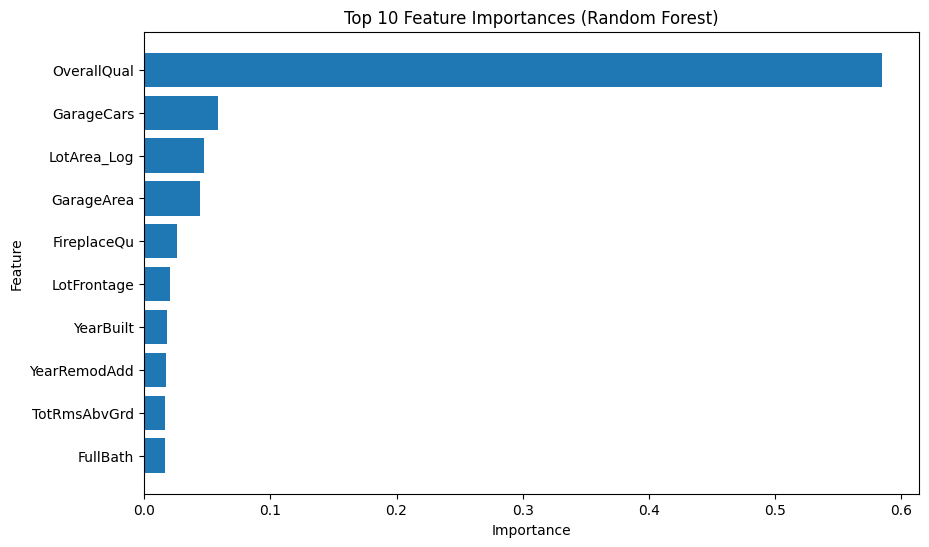

In [ ]:
# Fitur importances
importances = rf_reg.feature_importances_

feature_importances = pd.DataFrame({'Feature': x_train.columns, 'Importance': importances})

# Urutkan dari yang paling penting
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Pilih top 10 fitur
top_10_features = feature_importances.head(10)


# Bar plot
plt.figure(figsize=(10, 6))
plt.barh(top_10_features['Feature'], top_10_features['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances (Random Forest)')
plt.gca().invert_yaxis()
plt.show()

Fitur yang paling berkontribusi dalam model ini adalah OverallQual. Artinya, untuk memprediksi harga jual rumah dengan model Random Forest, kualitas rumah secara keseluruhan paling berpengaruh.

In [ ]:
pred_rf = rf_reg.predict(x_test)
pred_rf = np.expm1(pred_rf)
print(pred_rf[:10])

[134906.04767764 148508.18764758 176003.37026774 182282.14304272
 209636.02738298 180022.80634718 180211.21886264 178323.85774594
 189634.8397088  122822.27855469]


##Support Vector Regressor

In [ ]:
svm_reg = SVR(kernel='rbf', C=1000000, epsilon=0.001)
svm_reg.fit(x_train, y_train)

train_pred = svm_reg.predict(x_train)
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["SVM Regressor", *evaluate(y_train, train_pred), 0]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = pd.concat([results_df, results_df_2], ignore_index=True)

MAE: 0.0010657996342579076
MSE: 1.1766239603264164e-06
RMSE: 0.0010847229878298036
R2 Square 0.9999926207541285
__________________________________


In [ ]:
pred_svr = svm_reg.predict(x_test)
pred_svr = np.expm1(pred_svr)
print(pred_svr[:10])

[117640.54294344 158477.7183942  191866.59533448 181963.34390767
 198579.0953026  182907.9686586  203922.84218236 176194.60175019
 183692.48167222 125209.7652228 ]


##Model Comparison

In [ ]:
results_df

Model           MAE           MSE          RMSE  \
0            Linear Regression  9.553984e-02  1.809833e-02  1.345300e-01   
1             Ridge Regression  9.590967e-02  1.834262e-02  1.354349e-01   
2             Lasso Regression  1.693414e-01  5.245093e-02  2.290217e-01   
3        Polynomial Regression  3.238810e-15  2.516574e-29  5.016547e-15   
4  Stochastic Gradient Descent  2.113299e-01  7.408077e-02  2.721778e-01   
5               Neural Network  2.248804e+00  9.607901e+00  3.099661e+00   
6      Random Forest Regressor  3.940027e-02  3.237951e-03  5.690300e-02   
7                SVM Regressor  1.065800e-03  1.176624e-06  1.084723e-03   

   R2 Square  Cross Validation  
0   0.886496     -3.416786e+24  
1   0.884964      8.605269e-01  
2   0.671052      6.658522e-01  
3   1.000000      0.000000e+00  
4   0.535399      0.000000e+00  
5 -59.256351      0.000000e+00  
6   0.979693      0.000000e+00  
7   0.999993      0.000000e+00

Dapat dilihat bahwa R-Square yang paling tinggi dimiliki oleh Polynomial Regression meskipun sedikit tidak masuk akal, kemudian diikuti oleh SVM Regressor dan Random Forest Regressor. Error yang dimiliki ketiga model tersebut pun lebih rendah dibandingkan model lainnya. Maka kami memutuskan untuk memakai hasil prediksi dari ketiga model ini.



In [ ]:
ids = range(1461, (1461 + len(pred_poly)))

#Creating the DataFrame
submission = pd.DataFrame({
    'Id': ids,
    'SalePrice': pred_poly
})

# Saving the DataFrame as a CSV file
submission.to_csv('submission_poly.csv', index=False)

In [ ]:
ids = range(1461, (1461 + len(pred_svr)))

#Creating the DataFrame
submission = pd.DataFrame({
    'Id': ids,
    'SalePrice': pred_svr
})

# Saving the DataFrame as a CSV file
submission.to_csv('submission_svr.csv', index=False)

In [ ]:
ids = range(1461, (1461 + len(pred_rf)))

#Creating the DataFrame
submission = pd.DataFrame({
    'Id': ids,
    'SalePrice': pred_rf
})

# Saving the DataFrame as a CSV file
submission.to_csv('submission_rf.csv', index=False)

**Kesimpulan Model**




*   Berdasarkan hasil submisi kaggle, prediksi dengan RMSE terendah adalah model Random Forest dibandingakan model SVM Regressor dan Polynomial Regression.
*   Dari hasil submisi kaggle didapatkan bahwa RMSE test lebih tinggi dari RMSE data train yaitu sebesar 0.1559 untuk 50% data test sedangkan RMSE data train hanya sebesar 0.05245. Artinya, ada indikasi bahwa model mengalami overfitting.
*   Model Neural Network tidak mampu menangkap pola dari data, dilihat dari nilai R-Square nya yang sampai menyentuh negatif dan nilai errornya yang relatif lebih tinggi dibandingkan model lainnya, sehingga model ini tidak direkomendasikan.





**Saran Model**



*   Mencoba model lain yang sekiranya lebih cocok.
*   Menghapus outlier atau noise pada data sehingga tidak mempengaruhi prediksi.
*   Melakukan fitur engineering.
*   Menghapus fitur-fitur yang tidak relevan agar mengurangi jumlah fitur sehingga menurunkan risiko overfitting.
*   Menambah data train agar model dapat lebih mempelajari data secara umum, tidak menghafal pola yg spesifik.




